# GloFas

In [3]:
import xarray as xr
from weatherforce.standardization import standardize_coordinates
import os
import matplotlib.pyplot as plt
from weatherforce.dataviz.maps.static import make_map_with_features
from weatherforce.spacetime.space import bbox_from_data
from weatherforce.standardization import standardize_coordinates
from cartopy.io import shapereader
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import seaborn as sns

## Example

In [2]:
def get_glofas(year:int=1993, month:int=1):
    filepath = f'/home/jovyan/data/historical/glofas_01deg/q/peru_north/{year}/{year}{month:02d}'
    filename = f'q_peru_north_{year}{month:02d}.nc'
        
    ds = xr.open_dataset(os.path.join(filepath, filename))
    ds = standardize_coordinates(ds)
    return ds

In [3]:
ds = get_glofas(1993, 4)
ds_mean = ds.mean(dim='time')
ds_mean

/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)


<xarray.Dataset>
Dimensions:  (lat: 104, lon: 88)
Coordinates:
    step     timedelta64[ns] ...
    surface  float64 ...
  * lat      (lat) float64 -3.15 -3.25 -3.35 -3.45 ... -13.25 -13.35 -13.45
  * lon      (lon) float64 277.9 278.1 278.2 278.3 ... 286.4 286.5 286.6 286.6
Data variables:
    q        (lat, lon) float32 nan nan nan nan nan ... 2.967 1.785 982.2 989.8

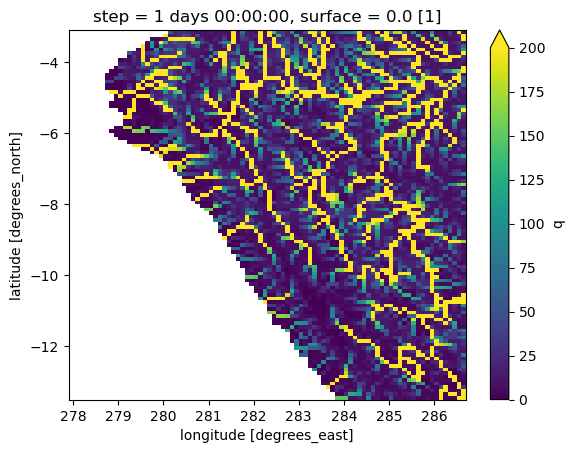

In [4]:
ds_mean.q.plot(vmax=200)

In [5]:
latb = [-7.230]
lonb = [-79.172]
lats = [-7.063781]
lons = [-79.552680]

/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


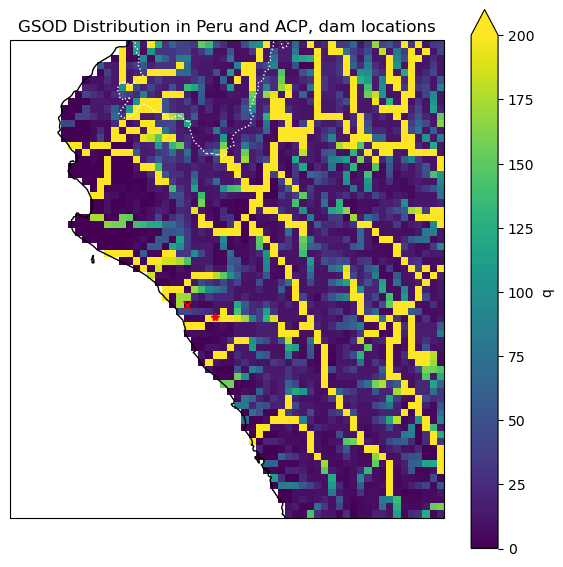

In [6]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-82, -76, -10, -3.4])

ds_mean.q.plot(vmax=200)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':', color='white')
ax.set_title(f"GSOD Distribution in Peru and ACP, dam locations");
ax.plot(lons, lats, 'x', color ='r')
ax.plot(lonb, latb, '*', color = 'r')


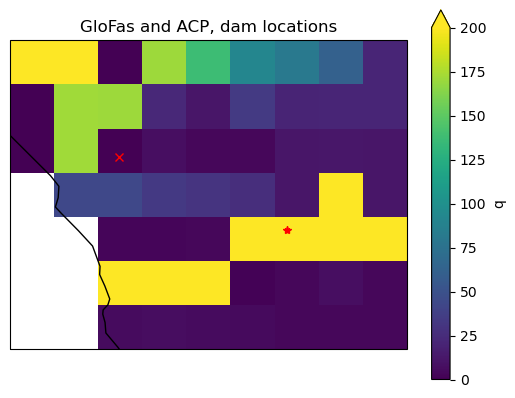

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-79.8, -78.9, -7.5, -6.8])

ds_mean.q.plot(vmax=200)
ax.add_feature(cfeature.COASTLINE)
ax.set_title('GloFas and ACP, dam locations');
ax.plot(lons, lats, 'x', color ='r')
ax.plot(lonb, latb, '*', color = 'r')


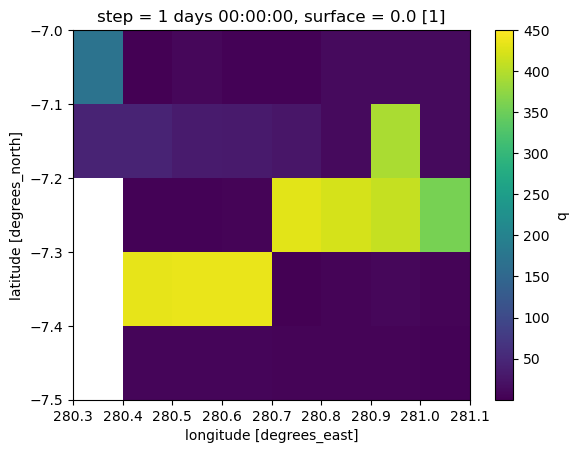

In [8]:
lon_min, lon_max = 280.3,281.1
lat_min, lat_max = -7,-7.5

selected_data = ds_mean.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
selected_data.q.plot(vmax=450)

In [9]:
dam = ds_mean.sel(lat=slice(-7.2, -7.3), lon=slice(280.8, 280.9))
print(f'At the Gallito Ciego dam, there is {dam.q.values} m3s-1')

At the Gallito Ciego dam, there is [[421.7802]] m3s-1


## Ref

In [4]:
def get_daily_ref_glofas():
    """
    Generate daily reference NetCDF files from monthly GloFAS NetCDF datasets.

    This function processes monthly GloFAS NetCDF datasets for each month (January to December) and
    calculates the daily reference values by summing up the daily river discharge rates and then
    calculating the daily mean.

    The generated daily reference NetCDF files are saved for each month.

    """
    # Loop through each month (January to December)
    for month in range(1, 13):
        # Open the monthly GloFAS NetCDF datasets concatenated along the 'time' dimension, then standardize
        filepath = f'/home/jovyan/data/historical/glofas_01deg/q/peru_north/*/*{month:02d}/*.nc'
        ds = xr.open_mfdataset(filepath, concat_dim='time', combine='nested')
        standard_ds = standardize_coordinates(ds)
            
        # Calculate the daily mean river discharge rates for each day of the month
        daily_mean = standard_ds.groupby('time.day').mean(dim='time')
        
        daily_mean.to_netcdf(f'/home/jovyan/data/share/heloise/ESA-WP11/GLOFAS/files_csv_nc/q_daily_ref_glofas_month_{month:02d}.nc')


In [ ]:
get_daily_ref_glofas()

In [5]:
def get_historical_glofas(year: int = None):
    """
    This function retrieves the historical daily values of river discharge (GloFAS product).
    By default, returns all the reference period (1991-2020). A option is to select a year in with the `year` 'arg'.
    """
    if year is None:
        filepath = f'/home/jovyan/data/historical/glofas_01deg/q/peru_north/*/*/*.nc'
        print(filepath)
    else:
        filepath = f'/home/jovyan/data/historical/glofas_01deg/q/peru_north/{year}/*/*.nc'

    ds = xr.open_mfdataset(filepath, concat_dim='time', combine='nested')
    standard_ds = standardize_coordinates(ds)

    return standard_ds

In [6]:
def get_historical_glofas_month(month: int = 1):
    """
    This function retrieves the historical daily values of river discharge (GloFAS product).
    By default, returns all the reference period (1991-2020). A option is to select a year in with the `year` 'arg'.
    """
    filepath = f'/home/jovyan/data/historical/glofas_01deg/q/peru_north/*/*{month:02d}/*.nc'
   
    ds = xr.open_mfdataset(filepath, concat_dim='time', combine='nested')
    standard_ds = standardize_coordinates(ds)

    return standard_ds

### North Peru


Reference of river discharge for month 1



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)


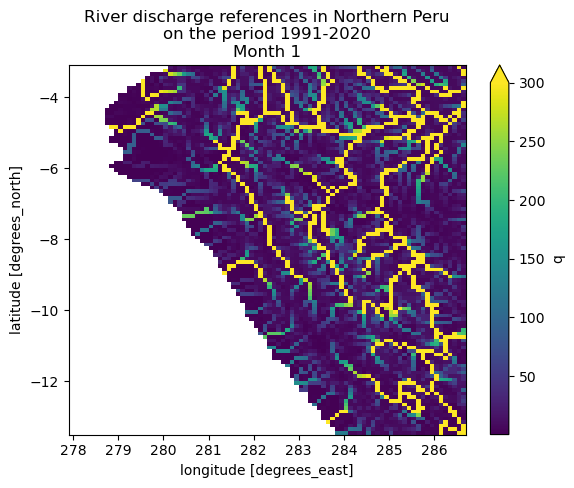


Reference of river discharge for month 2



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)


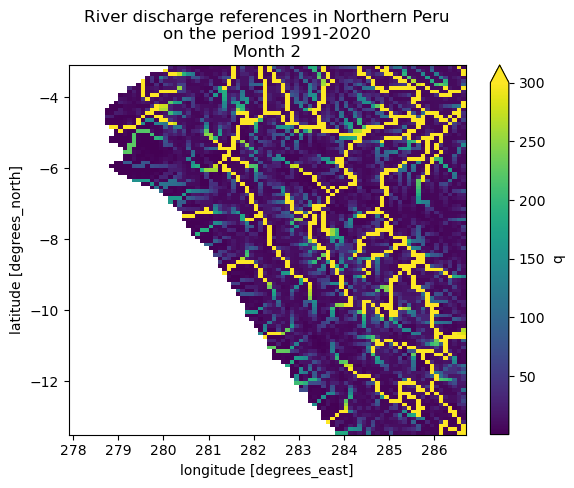


Reference of river discharge for month 3



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)


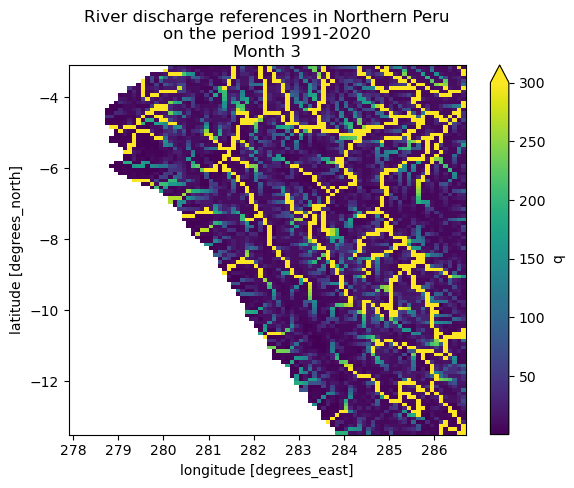


Reference of river discharge for month 4



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)


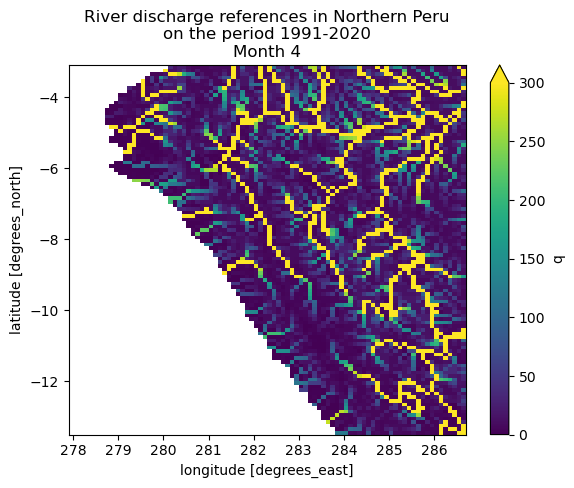


Reference of river discharge for month 5



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)


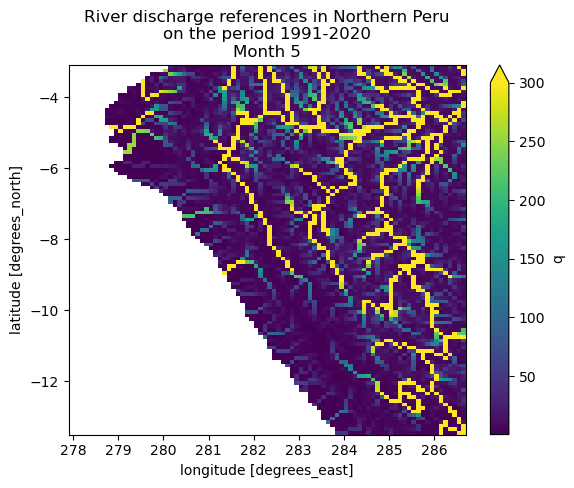


Reference of river discharge for month 6



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)


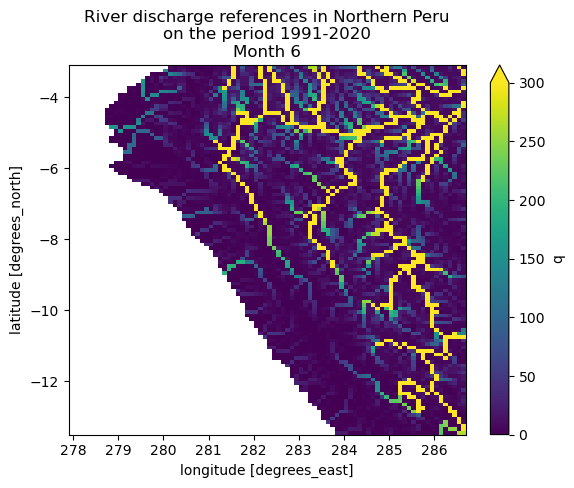


Reference of river discharge for month 7



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)


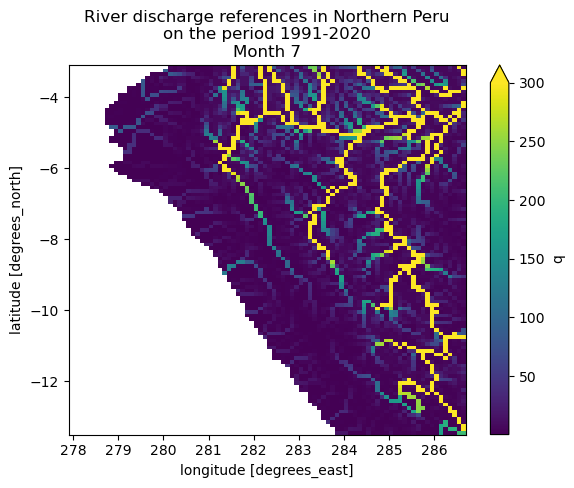


Reference of river discharge for month 8



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)


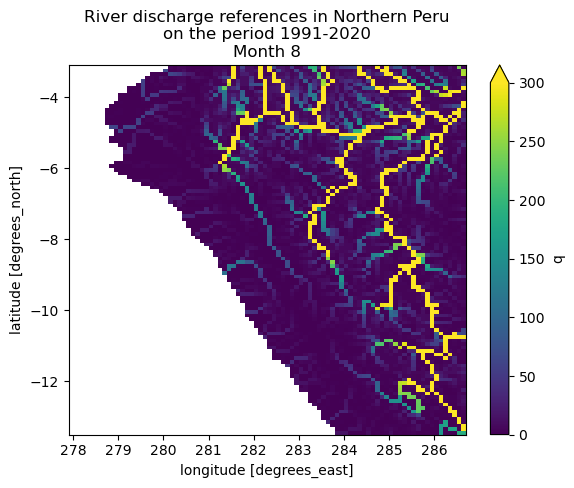


Reference of river discharge for month 9



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)


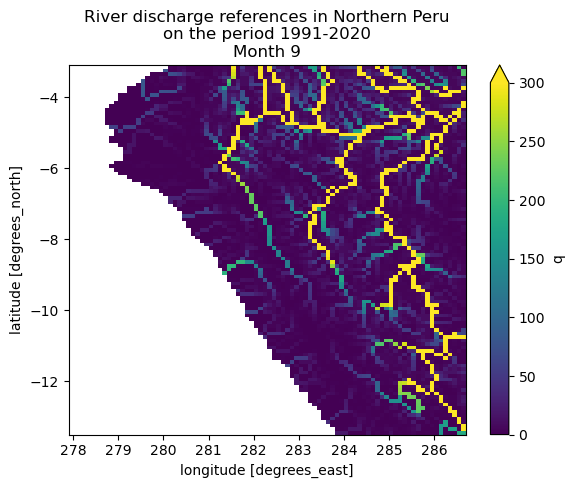


Reference of river discharge for month 10



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)


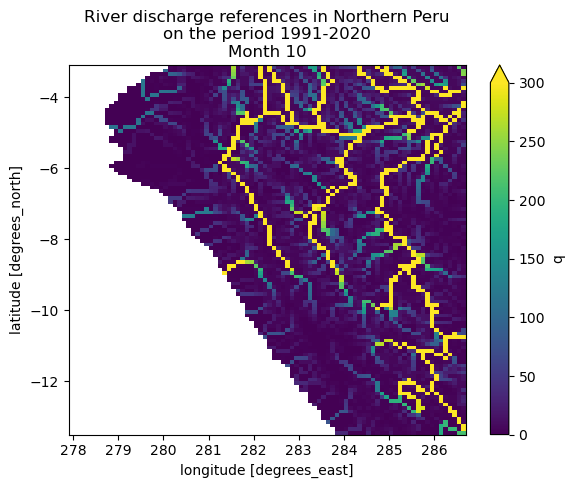


Reference of river discharge for month 11



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)


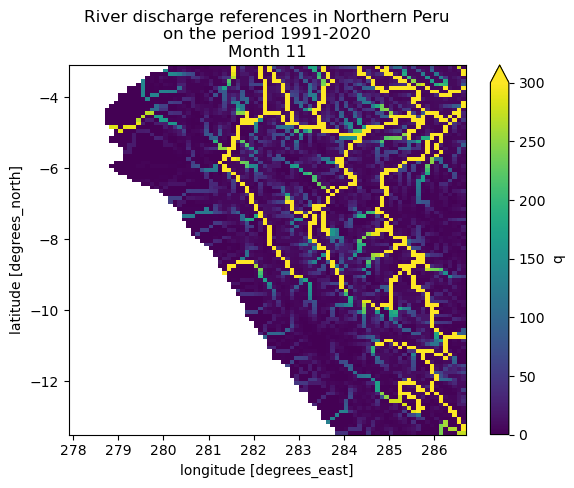


Reference of river discharge for month 12



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)


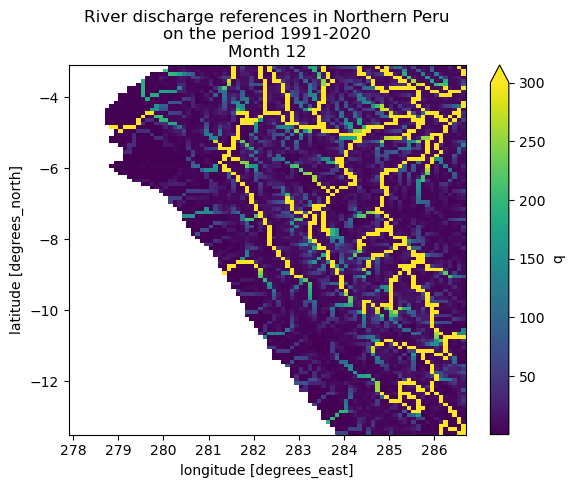

In [7]:
list_path = []

for month in range (1,13):
    print(f'\nReference of river discharge for month {month}\n')
    ds_month = get_historical_glofas_month(month)
    mean_month = ds_month.mean(dim='time')
    mean_month.q.plot(vmax=300)
    plt.title('River discharge references in Northern Peru' + os.linesep +
                 'on the period 1991-2020' + os.linesep + f'Month {month}', fontsize=12);
    frame = f'/home/jovyan/data/share/heloise/ESA-WP11/GLOFAS/figures/q_ref_glofas_month_{month}.png'
    list_path.append(frame)
    plt.savefig(frame)
    plt.show()
    plt.close()

In [8]:
import imageio.v2 as imageio
ims = [imageio.imread(f) for f in list_path]
imageio.mimwrite(f'/home/jovyan/data/share/heloise/ESA-WP11/GLOFAS/figures/q_ref.gif', ims, format='GIF', duration=0.5)

### Cajamarca region

In [17]:
latb = [-7.230]
lonb = [-79.172]
lats = [-7.063781]
lons = [-79.552680]


Reference of river discharge, month 1



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


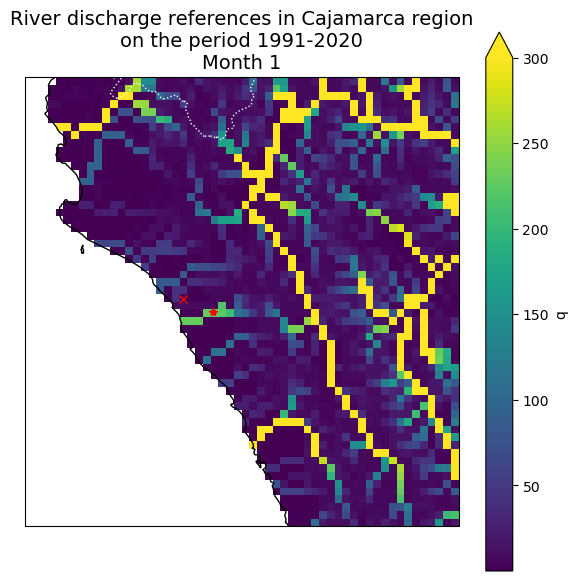


Reference of river discharge, month 2



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


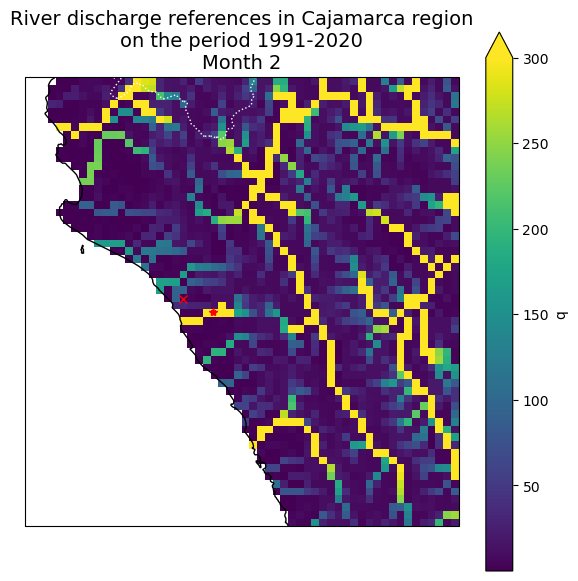


Reference of river discharge, month 3



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


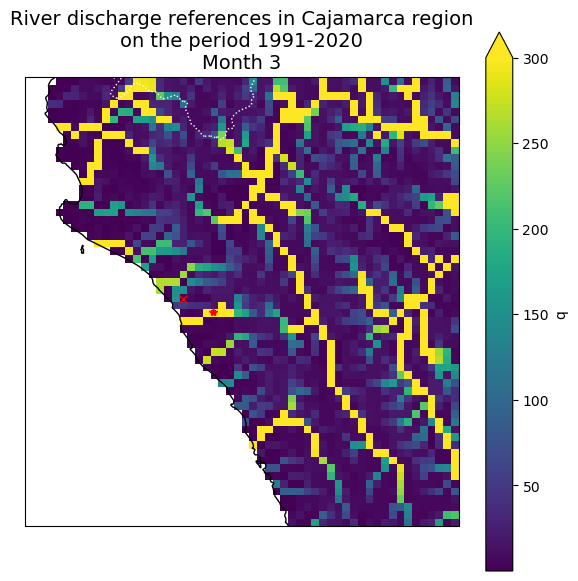


Reference of river discharge, month 4



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


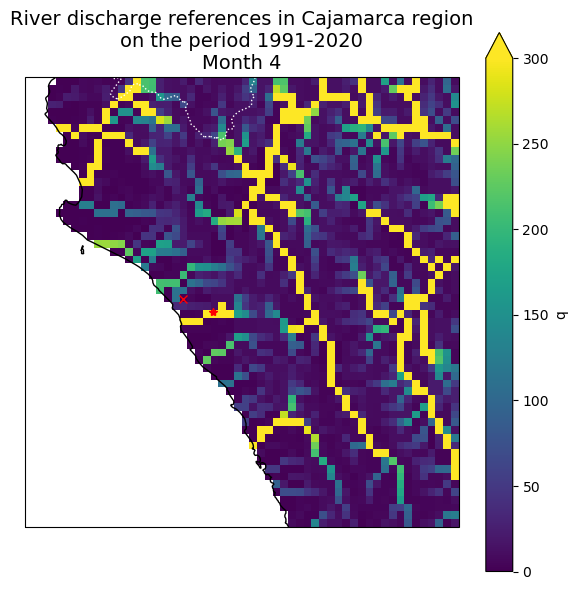


Reference of river discharge, month 5



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


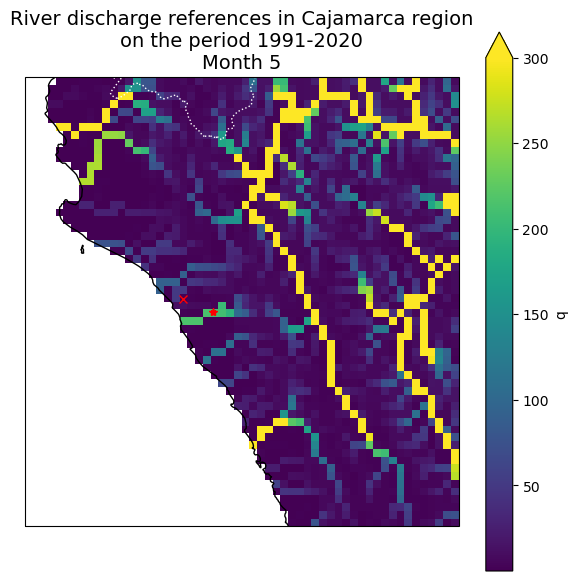


Reference of river discharge, month 6



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


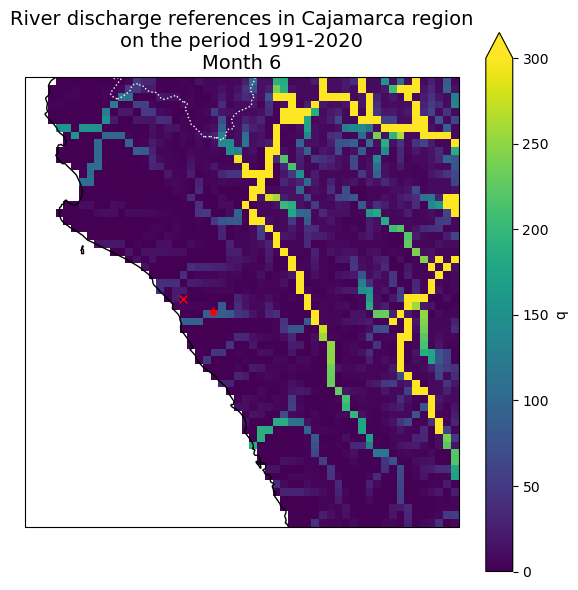


Reference of river discharge, month 7



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


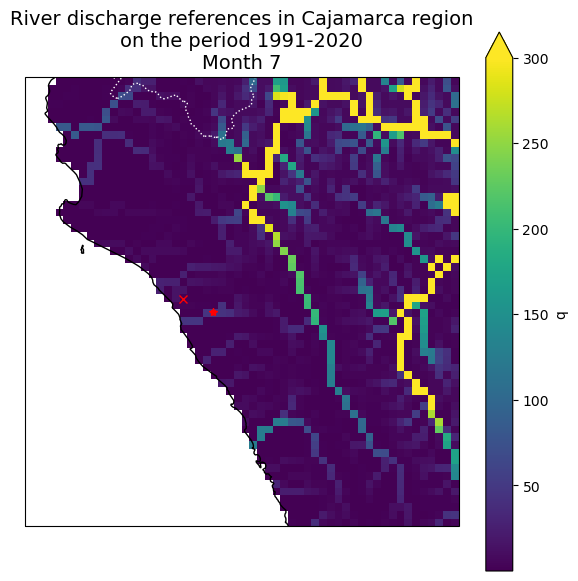


Reference of river discharge, month 8



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


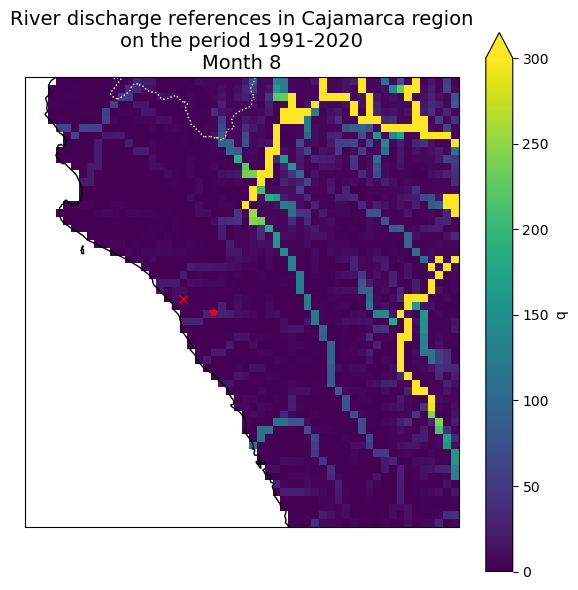


Reference of river discharge, month 9



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


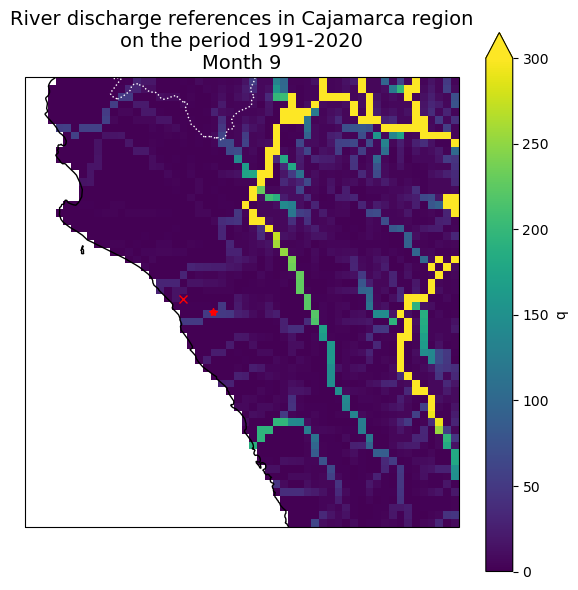


Reference of river discharge, month 10



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


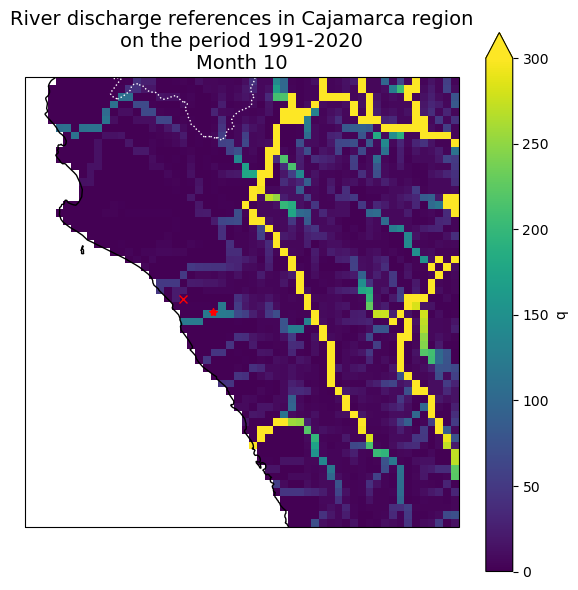


Reference of river discharge, month 11



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


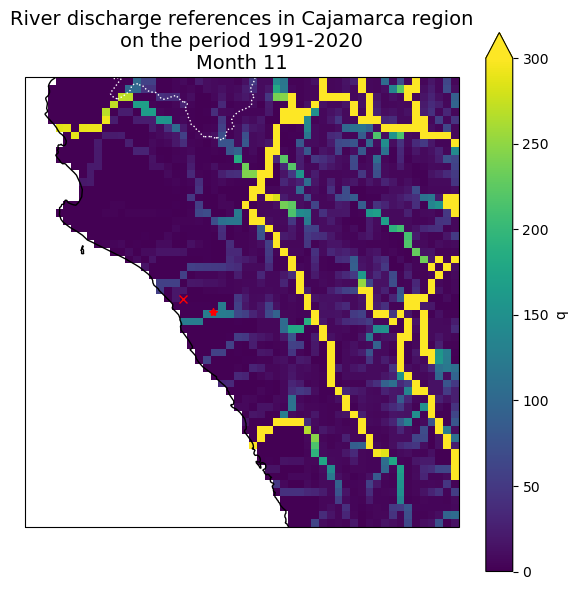


Reference of river discharge, month 12



/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


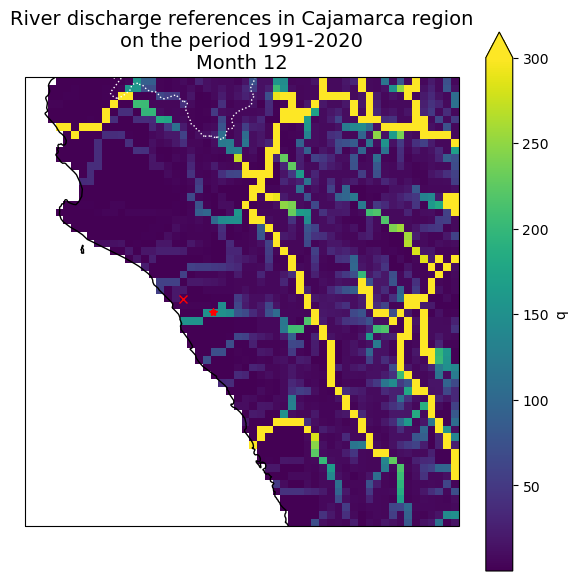

In [18]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

list_path_zoom = []

for month in range (1,13):
    print(f'\nReference of river discharge, month {month}\n')
    ds_month = get_historical_glofas_month(month)
    mean_month = ds_month.mean(dim='time')
    
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-81.6, -76, -10, -4.2])
    mean_month.q.plot(vmax=300)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':', color='white')
    ax.set_title('River discharge references in Cajamarca region' + os.linesep +
                 'on the period 1991-2020' + os.linesep + f'Month {month}', fontsize=14);
    ax.plot(lons, lats, 'x', color ='r')
    ax.plot(lonb, latb, '*', color = 'r')
    frame = f'/home/jovyan/data/share/heloise/ESA-WP11/GLOFAS/figures/q_ref_glofas_zoom_month_{month}.png'
    list_path_zoom.append(frame)
    plt.savefig(frame)
    plt.show()
    plt.close()


In [19]:
import imageio.v2 as imageio
ims = [imageio.imread(f) for f in list_path_zoom]
imageio.mimwrite(f'/home/jovyan/data/share/heloise/ESA-WP11/GLOFAS/figures/q_ref_zoom.gif', ims, format='GIF', duration=0.5)

## Anomalies & reforcast

#### Functions to generate anomalies

In [9]:
def get_ref_step_days(start_day: int = 1, start_month: int = 1, day_interval: int = 30, num_days: int = 7):
    """
    Generate a list of daily reference DataArrays from a monthly NetCDF dataset, starting from a given day and month.

    Parameters:
        start_day (int): The starting day of the first reference DataArray (default: 1).
        start_month (int): The starting month of the first reference DataArray (default: 1).
        day_interval (int): The number of days between each reference DataArray, the step (default: 30).
        num_days (int): The number of reference DataArrays to generate (default: 7).

    Returns:
        list: A list containing the daily reference DataArrays.

    """
    
    # Initialization
    current_day = start_day
    current_month = start_month
    remaining_days = day_interval
    target = False
    
    ref_days = []

    # Loop to generate the required number of reference DataArrays
    for _ in range(num_days):
        
        # Check if the target day has been reached for the current month
        while not target:
            filepath = f'/home/jovyan/data/share/heloise/ESA-WP11/GLOFAS/files_csv_nc/q_daily_ref_glofas_month_{current_month:02d}.nc'
            ds_ref_daily = xr.open_dataset(filepath)
            
            # If the target day is within the range of the current month, update the current day and set the target flag
            if (current_day + remaining_days) <= ds_ref_daily.day.size:
                current_day = current_day + remaining_days
                target = True
            else:
                # If the target day is outside the range of the current month, move to the next month
                current_month = (current_month + 1) % 12 or 12
                
                # Calculate the number of remaining days to add for the next reference DataArray
                remaining_days = remaining_days - (ds_ref_daily.day.size - current_day) - 1
                
                # Reset the current day to the first day of the next month
                current_day = 1
        
        # Get the target month and day
        target_month = current_month
        target_day = current_day
        
        # Select the reference DataArray for the target day
        ref_day = ds_ref_daily.isel(day=target_day - 1)
        
        # Reset the target flag and remaining days for the next iteration
        target = False
        remaining_days = day_interval
        
        # Add the reference DataArray to the list
        ref_days.append(ref_day)

    return ref_days


In [ ]:
get_glofas_reforecast_year_month()

In [10]:
def get_glofas_reforecast_year_month(year: int = 1993, month: int = 1):
    
    filepath = f'/home/jovyan/data/forecast/glofas_reforecast_01deg/q/peru_north/{year}/{year}{month:02d}/q_peru_north_{year}{month:02d}.nc'
    ds = xr.open_dataset(filepath)
    standard_ds = standardize_coordinates(ds)
    return standard_ds


In [11]:
def get_glofas_forecast_year_month(year: int = 2021, month: int = 6):
    
    filepath = f'/home/jovyan/data/forecast/glofas_01deg/q/peru_north/{year}/{year}{month:02d}/q_peru_north_{year}{month:02d}.nc'
    ds = xr.open_dataset(filepath)
    standard_ds = standardize_coordinates(ds)
    return standard_ds


In [12]:
def generate_anomalies_step(year: int = 1993, month: int = 1, step: int = 0, type_an: str = 'absolute') -> xr.DataArray:
    """
    Generate river discharge anomalies for a specific year, month, and step.

    Parameters:
        year (int): The year for which to generate anomalies (default: 1993).
        month (int): The month for which to generate anomalies (default: 1).
        step (int): The step day for the forecast (default: 0).
        type_an (str): The type of anomaly to calculate ('absolute' or 'relative') (default: 'absolute').

    Returns:
        xr.DataArray: An array containing the river discharge anomalies.

    """
    # Get the forecast or reforcast data
    if (year >= 2021):
        ds_forecast = get_glofas_forecast_year_month(year, month)
    else:   
        ds_forecast = get_glofas_reforecast_year_month(year, month)
    ds_forecast_member_mean = ds_forecast.mean(dim='number')
    
    # Select the step day for the forecast
    forecast = ds_forecast_member_mean.isel(step=step)

    # Get the day of the reforcast
    day = forecast.time.dt.day.item()
    
    # Get the historical reference data for the new month
    ds_ref = get_ref_step_days(start_day = day, start_month = month, day_interval = 30, num_days = 7)
    ref = ds_ref[step]

    if type_an == 'absolute':
        # Calculate the absolute anomalies by subtracting the forecast data from the reference data
        anomalies = forecast - ref
        anomalies.attrs['units'] = 'm3s-1'
        anomalies.attrs['long_name'] = 'Total river discharge absolute anomaly'
    elif type_an == 'relative':
        anomalies = ((forecast - ref) / ref) * 100
        anomalies.attrs['units'] = '%'
        anomalies.attrs['long_name'] = 'Total river discharge relative anomaly'
    else:
        print("Please choose the type of anomaly: 'absolute' or 'relative'.")
        anomalies = None
        
    return anomalies


#### Function for plotting

In [13]:
def plot_anomalies_step(anomalies: xr.DataArray, step) -> None:

    fig, ax, cbar_ax = make_map_with_features(bbox_from_data(anomalies))
    start = anomalies.time.dt.strftime('%d-%m-%Y').item()
    step_day = anomalies.valid_time.dt.strftime('%d-%m-%Y').item()
    cmap = plt.cm.get_cmap('RdBu') # Set the colormap from red to blue
    
    # Region boundaries
    kw = dict(resolution='10m', category='cultural', name='admin_1_states_provinces')
    states_shp = shapereader.natural_earth(**kw)
    reader = shapereader.Reader(states_shp)
    current_country = [country for country in reader.records() if country.attributes["admin"] == "Peru"]

    for region in current_country:
        shape_feature = ShapelyFeature([region.geometry], ccrs.PlateCarree(), edgecolor='black', lw=1, facecolor="none")
        ax.add_feature(shape_feature)
    
    if anomalies.attrs.get('units') == '%':
        type_an = 'rel'
        vmin, vmax = -200, 200 
    else:
        type_an = 'abs'
        vmin, vmax = -200, 200 
    
    anomalies.q.plot(ax=ax, cbar_ax=cbar_ax, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_title(f'Step: +{(step+1)*30} days \n {step_day}')
    
    lata, lona = [-7.063781], [-79.552680] # ACP
    latb, lonb = [-7.230], [-79.172] # Gallito Ciego dam
    ax.plot(lona, lata, '*', color ='r', label = 'ACP')
    ax.plot(lonb, latb, '*', color = 'g', label = 'Dam')
        
    fig.suptitle('River discharge anomaly'
              + os.linesep
              + f'Start data: {start}', fontsize=12)
    plt.tight_layout()
    plt.show()
    fig.savefig(f'/home/jovyan/data/share/heloise/ESA-WP11/GLOFAS/figures/anomalies_{type_an}_{start}_step_{step}.png')
    plt.close()


In [14]:
def plot_anomalies_step_zoom(anomalies: xr.DataArray, step, zoom: int = 1) -> None:

    fig, ax, cbar_ax = make_map_with_features(bbox_from_data(anomalies))
    start = anomalies.time.dt.strftime('%d-%m-%Y').item()
    step_day = anomalies.valid_time.dt.strftime('%d-%m-%Y').item()
    cmap = plt.cm.get_cmap('RdBu') # Set the colormap from red to blue
    
    # Region boundaries
    kw = dict(resolution='10m', category='cultural', name='admin_1_states_provinces')
    states_shp = shapereader.natural_earth(**kw)
    reader = shapereader.Reader(states_shp)
    current_country = [country for country in reader.records() if country.attributes["admin"] == "Peru"]

    for region in current_country:
        shape_feature = ShapelyFeature([region.geometry], ccrs.PlateCarree(), edgecolor='black', lw=1, facecolor="none")
        ax.add_feature(shape_feature)

    if (zoom==1):
        ax.set_extent([-79.7, -78.7, -7.5, -6.9])
    elif (zoom==2):
        ax.set_extent([-79.8, -75, -8.3, -5.3])
    
    if anomalies.attrs.get('units') == '%':
        type_an = 'rel'
        vmin, vmax = -200, 200 
    else:
        type_an = 'abs'
        vmin, vmax = -200, 200 
    
    anomalies.q.plot(ax=ax, cbar_ax=cbar_ax, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_title(f'Step: +{(step+1)*30} days \n {step_day}')
    
    lata, lona = [-7.063781], [-79.552680] # ACP
    latb, lonb = [-7.230], [-79.172] # Gallito Ciego dam
    ax.plot(lona, lata, '*', color ='r', label = 'ACP')
    ax.plot(lonb, latb, '*', color = 'g', label = 'Dam')
        
    fig.suptitle('River discharge anomaly'
              + os.linesep
              + f'Start data: {start}', fontsize=12)
    plt.tight_layout()
    plt.show()
    plt.close()


    # Display the plot
    plt.show()
    fig.savefig(f'/home/jovyan/data/share/heloise/ESA-WP11/GLOFAS/figures/anomalies_{type_an}_{start}_step_{step}_zoom.png')
    plt.close()

#### Test

In [15]:
test = generate_anomalies_step(year=2000, month=2)
test

<xarray.Dataset>
Dimensions:     (lat: 104, lon: 88)
Coordinates:
    time        datetime64[ns] 2000-02-01
    surface     float64 0.0
  * lat         (lat) float64 -3.15 -3.25 -3.35 -3.45 ... -13.25 -13.35 -13.45
  * lon         (lon) float64 277.9 278.1 278.2 278.3 ... 286.5 286.6 286.6
    valid_time  datetime64[ns] ...
    day         int64 2
Data variables:
    q           (lat, lon) float32 nan nan nan nan ... 2.141 1.557 4.289 3.784
Attributes:
    units:      m3s-1
    long_name:  Total river discharge absolute anomaly

Text(0.5, 1.0, 'River discharges anomalies \n Start: 01-02-2000, step day: 02-03-2000')

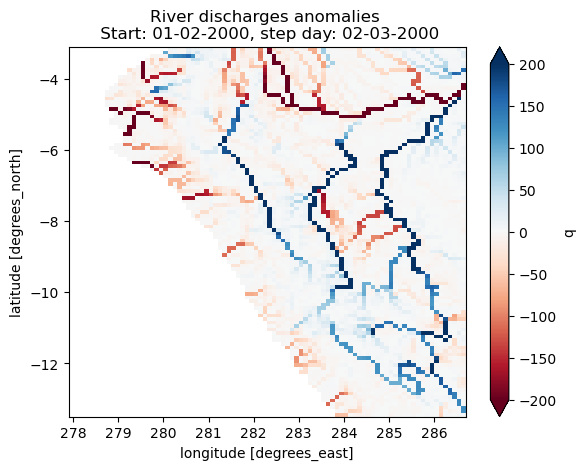

In [36]:
test.q.plot(cmap=plt.cm.get_cmap('RdBu'), vmax=200)
start = test.time.dt.strftime('%d-%m-%Y').item()
step_day = test.valid_time.dt.strftime('%d-%m-%Y').item()
plt.title(f'River discharges anomalies \n Start: {start}, step day: {step_day}')

In [37]:
test_rel =  generate_anomalies_step(year = 2000, step=0, month = 6, type_an = 'relative')
test_rel

<xarray.Dataset>
Dimensions:     (lat: 104, lon: 88)
Coordinates:
    time        datetime64[ns] 2000-06-01
    surface     float64 0.0
  * lat         (lat) float64 -3.15 -3.25 -3.35 -3.45 ... -13.25 -13.35 -13.45
  * lon         (lon) float64 277.9 278.1 278.2 278.3 ... 286.5 286.6 286.6
    valid_time  datetime64[ns] ...
    day         int64 1
    step        timedelta64[ns] ...
Data variables:
    q           (lat, lon) float32 nan nan nan nan ... -34.06 -8.958 -8.933
Attributes:
    units:      %
    long_name:  Total river discharge relative anomaly

Text(0.5, 1.0, 'River discharges relative anomalies \n Start: 01-06-2000, step day: 01-07-2000')

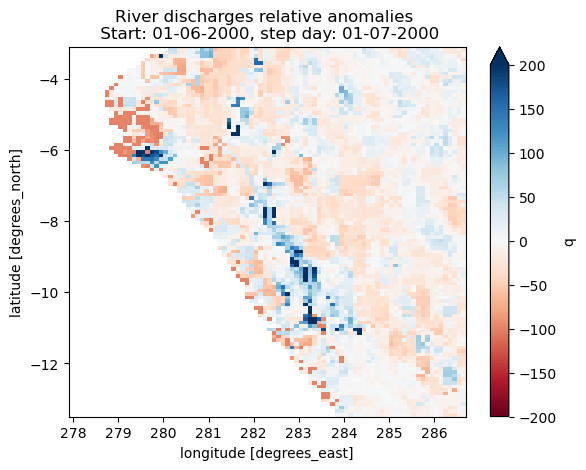

In [38]:
test_rel.q.plot(cmap=plt.cm.get_cmap('RdBu'), vmax=200)
start = test_rel.time.dt.strftime('%d-%m-%Y').item()
step_day = test_rel.valid_time.dt.strftime('%d-%m-%Y').item()
plt.title(f'River discharges relative anomalies \n Start: {start}, step day: {step_day}')

/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


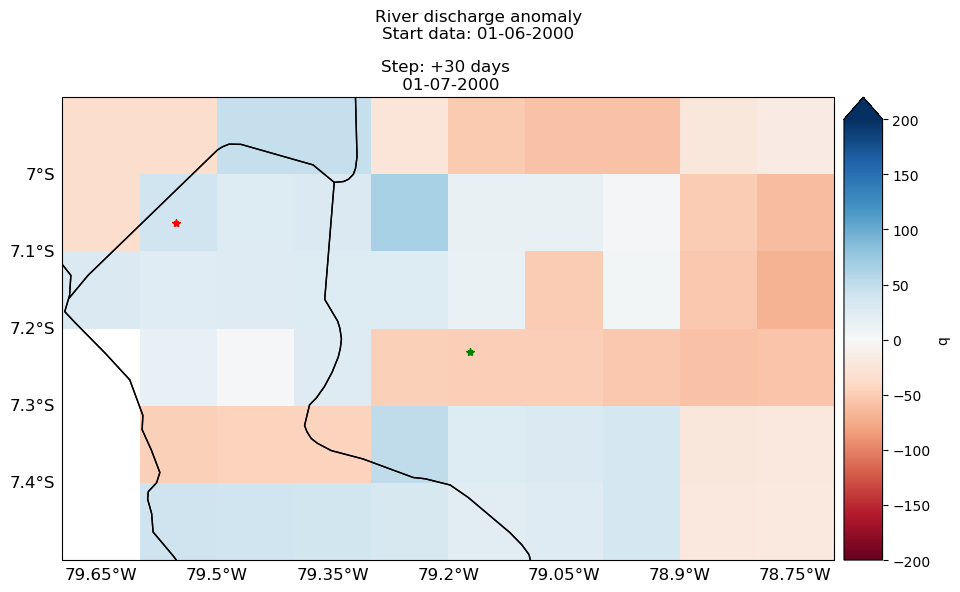

In [39]:
plot_anomalies_step_zoom(test_rel, step=0, zoom=1)

#### Plot all the anomalies

In [ ]:
year = 2023
for month in range (1,13):
    for step in range (0,7):
        anomalies_abs = generate_anomalies_step(year=year, month=month, step = step, type_an='absolute')
        anomalies_rel = generate_anomalies_step(year=year, month=month, step = step, type_an='relative')

        plot_anomalies_step(anomalies_abs, step)
        plot_anomalies_step_zoom(anomalies_abs, step, 1)
        plot_anomalies_step_zoom(anomalies_abs, step, 2)
        #plot_anomalies_step(anomalies_rel, step)
        plot_anomalies_step_zoom(anomalies_rel,step, 1)
        plot_anomalies_step_zoom(anomalies_rel,step, 2)


In [ ]:
for year in range (1993,1994):
    for month in range (1,13):
        for step in range (0,7):
            anomalies_abs = generate_anomalies_step(year=year, month=month, step = step, type_an='absolute')
            anomalies_rel = generate_anomalies_step(year=year, month=month, step = step, type_an='relative')

            plot_anomalies_step(anomalies_abs, step)
            plot_anomalies_step_zoom(anomalies_abs, step)
            #plot_anomalies_step(anomalies_rel, step)
            plot_anomalies_step_zoom(anomalies_rel,step)


#### Grid of the plot

In [16]:
def plot_grid_images(years, step, type_an: str = 'absolute', zoom:bool=False):
    
    if (type_an == 'absolute'):
        type_an = 'abs'
    elif (type_an == 'relative'):
        type_an = 'rel'
    else :
        print("Wrong type of anomaly, please choose 'absolute' or 'relative'")
    
    # Define the grid size based on the number of years and months
    grid_shape = (len(years), 12)
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Create a new figure and subplot grid
    fig, axs = plt.subplots(*grid_shape, figsize=(50, 20))

    # Iterate over the years and months to plot the images
    for year_idx, year in enumerate(years):
        for month in range(1,13):
            # Get the file path of the PNG image
            if not (zoom):
                file_path = f'/home/jovyan/data/share/heloise/ESA-WP11/GLOFAS/figures/anomalies_{type_an}_01-{month:02d}-{year}_step_{step}.png'
            else:
                file_path = f'/home/jovyan/data/share/heloise/ESA-WP11/GLOFAS/figures/anomalies_{type_an}_01-{month:02d}-{year}_step_{step}_zoom.png'

            
            # Read the image data using matplotlib's imread function
            img_data = plt.imread(file_path)

            # Display the image on the corresponding subplot
            axs[year_idx, month-1].imshow(img_data)

            # Remove ticks and labels from the subplots
            axs[year_idx, month-1].axis('off')

    # Set the overall title of the plot
    fig.suptitle(f'River discharge {type_an} anomalies for step + {(step+1)*30} days', fontsize=18)

    # Adjust the spacing between subplots and remove margins at the sides
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)

    # Save the plot without extra whitespace
    if not (zoom):
        fig.savefig(f'/home/jovyan/data/share/heloise/ESA-WP11/GLOFAS/figures/1-anomalies_step_{step}.png', dpi=300, bbox_inches='tight')
    else:
        fig.savefig(f'/home/jovyan/data/share/heloise/ESA-WP11/GLOFAS/figures/1-anomalies_step_{step}_zoom.png', dpi = 300, bbox_inches='tight')

    # Show the plot
    plt.show()


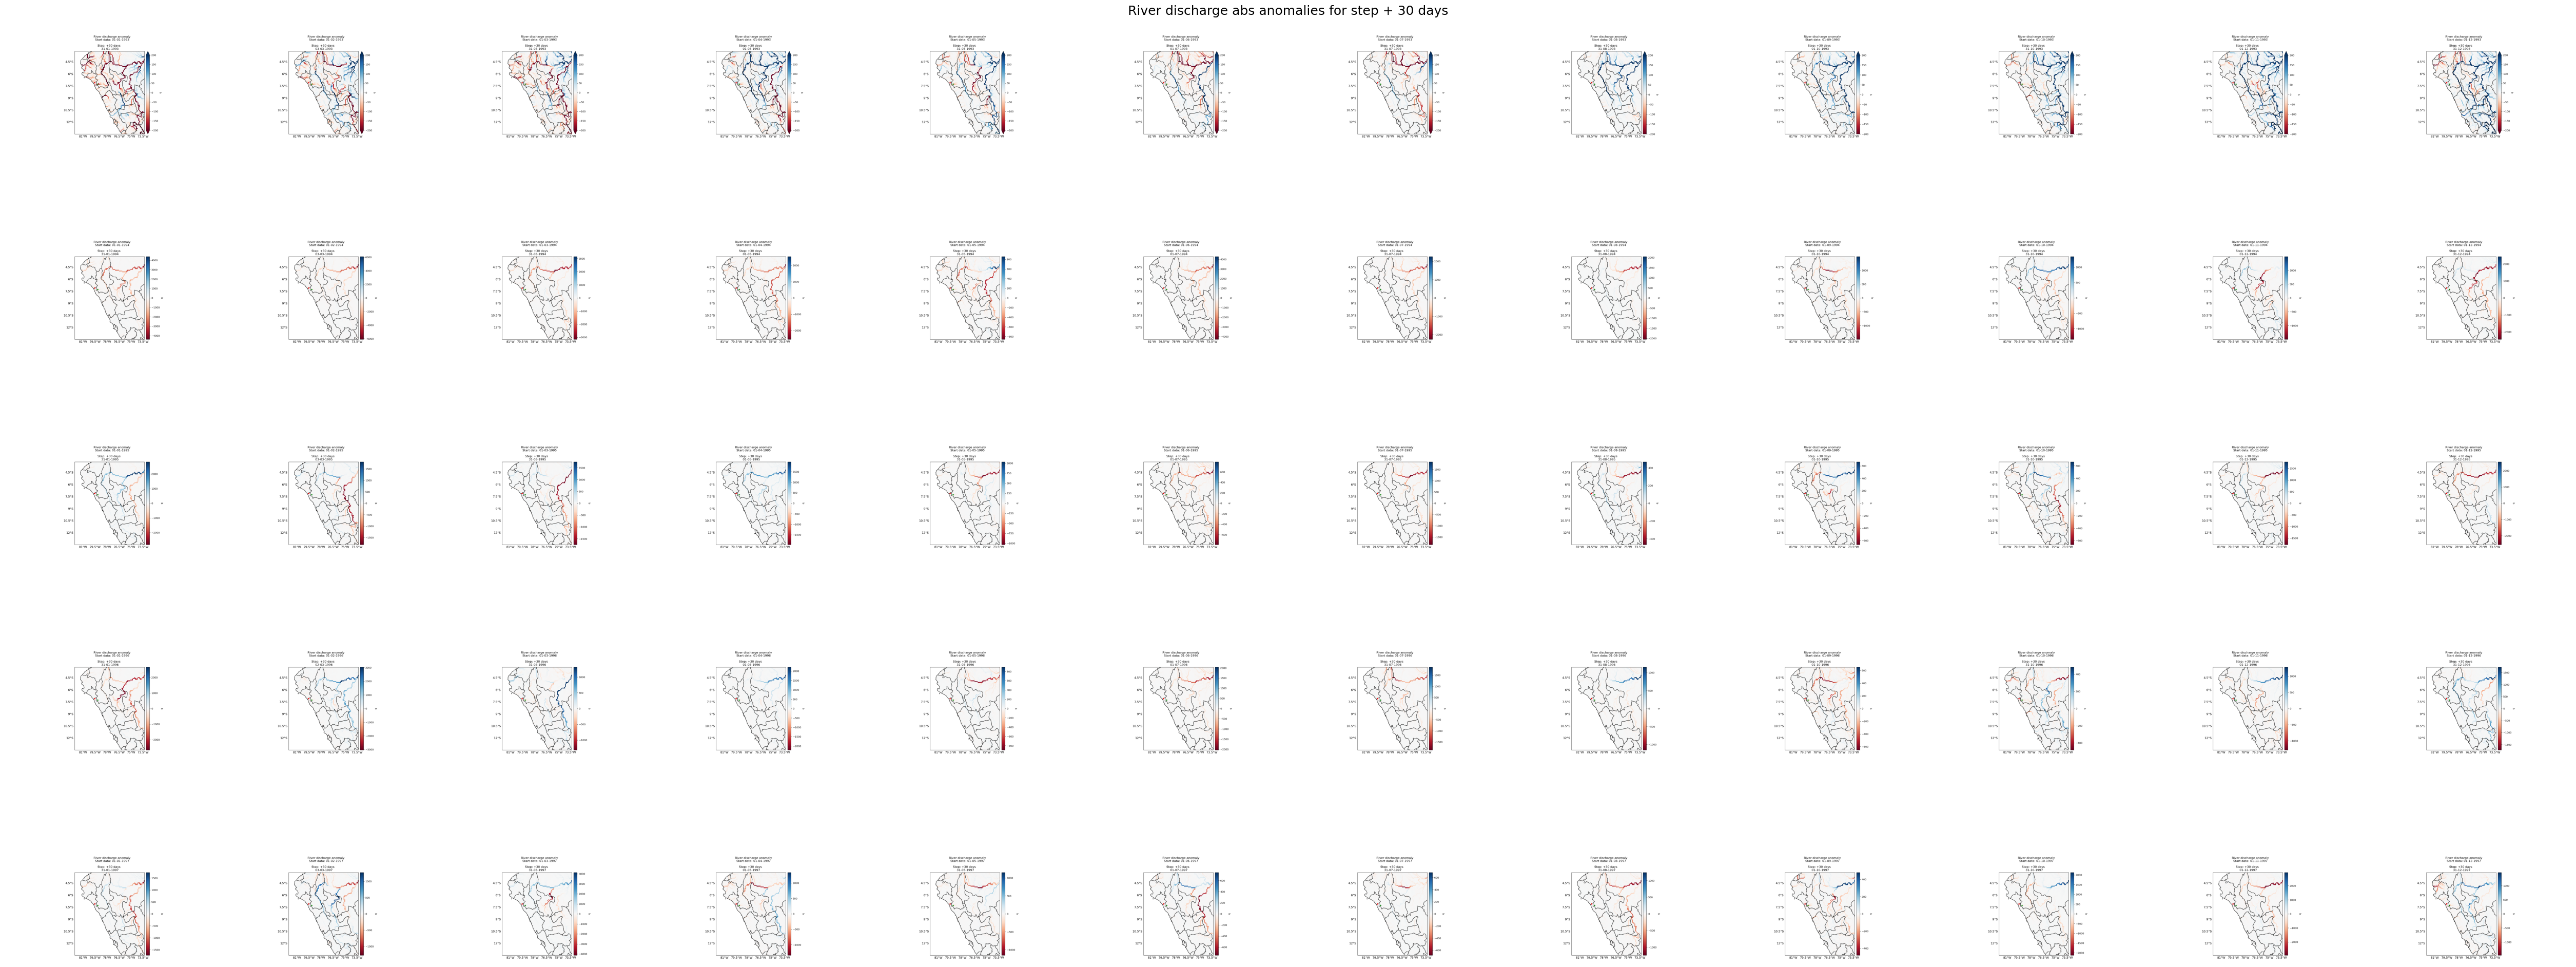

In [46]:
plot_grid_images(years=[i for i in range (1993,1998)], step=0, type_an = 'absolute')

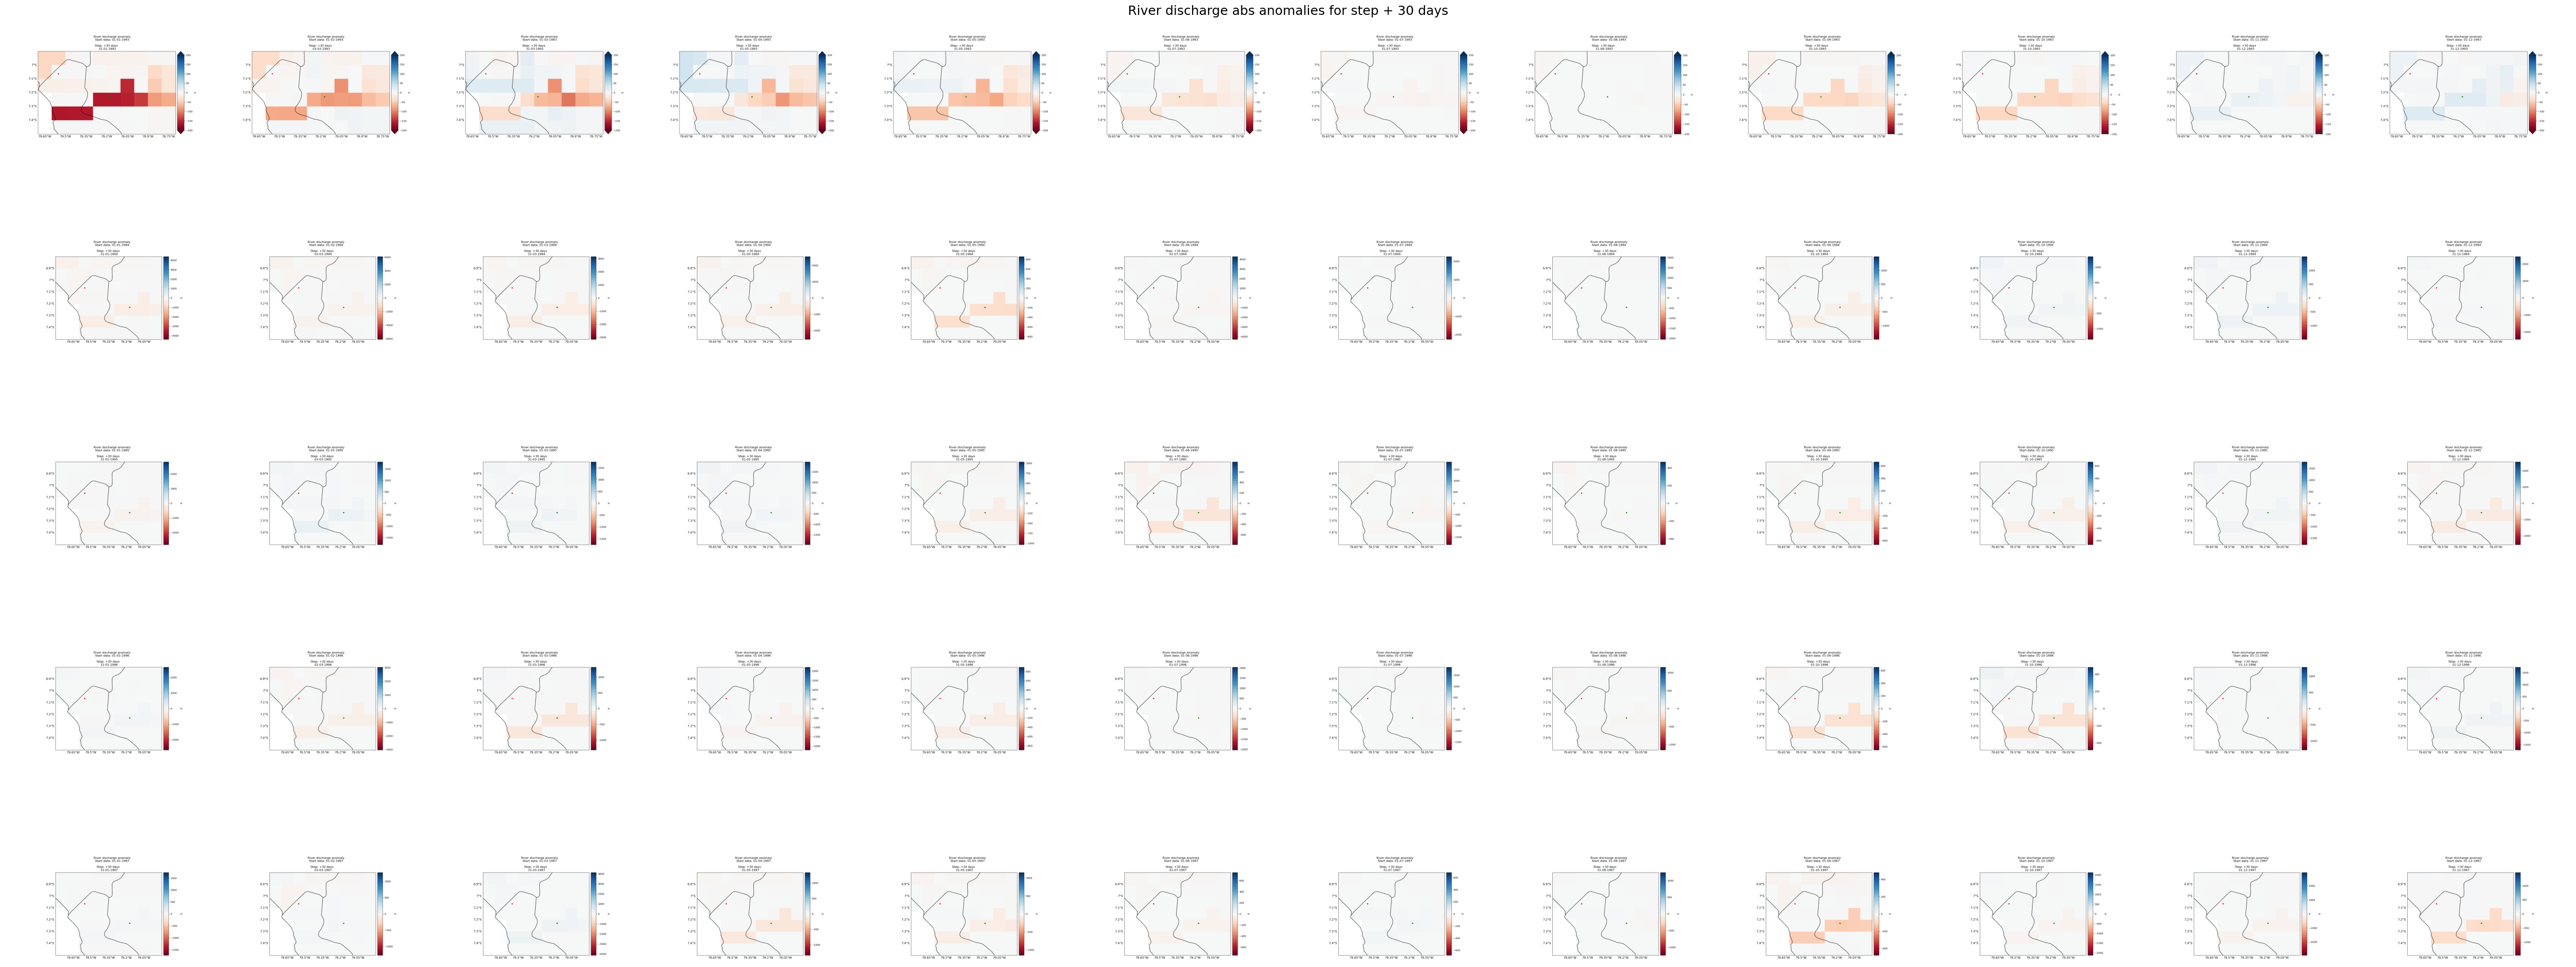

In [45]:
plot_grid_images(years=[i for i in range (1993,1998)], step=0, zoom=1, type_an = 'absolute')

In [ ]:
plot_grid_images(years=[i for i in range (1993,1998)], step=0, zoom=1, type_an = 'relative')

## Dam data

In [ ]:
dam_data = []

# Reforcast anomalies
for year in range (1993,2021):
    for month in range (1,13):
        for step in range (0,7):
            anomalies_rel = generate_anomalies_step(year=year, month=month, step = step, type_an='relative')
            dam_rel = anomalies_rel.sel(lat=slice(-7.2, -7.3), lon=slice(280.8, 280.9))
            dam_data.append({'year': year, 'month': month, 'step': (step+1)*30, 'anomaly_rel': dam_rel.q.values[0][0]})

# Forecast anomalies        
year = 2021
for month in range (6,13):
    for step in range (0,7):
        anomalies_rel = generate_anomalies_step(year=year, month=month, step = step, type_an='relative')
        dam_rel = anomalies_rel.sel(lat=slice(-7.2, -7.3), lon=slice(280.8, 280.9))
        dam_data.append({'year': year, 'month': month, 'step': (step+1)*30, 'anomaly_rel': dam_rel.q.values[0][0]})

year = 2022
for month in range (1,13):
    for step in range (0,7):
        anomalies_rel = generate_anomalies_step(year=year, month=month, step = step, type_an='relative')
        dam_rel = anomalies_rel.sel(lat=slice(-7.2, -7.3), lon=slice(280.8, 280.9))
        dam_data.append({'year': year, 'month': month, 'step': (step+1)*30, 'anomaly_rel': dam_rel.q.values[0][0]})

year = 2023
for month in range (1,8):
    for step in range (0,7):
        anomalies_rel = generate_anomalies_step(year=year, month=month, step = step, type_an='relative')
        dam_rel = anomalies_rel.sel(lat=slice(-7.2, -7.3), lon=slice(280.8, 280.9))
        dam_data.append({'year': year, 'month': month, 'step': (step+1)*30, 'anomaly_rel': dam_rel.q.values[0][0]})

df_dam = pd.DataFrame(dam_data)
df_dam.to_csv('/home/jovyan/data/share/heloise/ESA-WP11/GLOFAS/files_csv_nc/dam_data.csv')


In [9]:
df_dam

year  month  step  anomaly_rel
0     1993      1    30   -56.368774
1     1993      1    60   -38.894981
2     1993      1    90   -43.275146
3     1993      1   120   -38.697605
4     1993      1   150   -56.952721
...    ...    ...   ...          ...
2529  2023      7    90   -65.816559
2530  2023      7   120   -53.960590
2531  2023      7   150    22.998861
2532  2023      7   180    13.875426
2533  2023      7   210    -1.481172

[2534 rows x 4 columns]

In [18]:
def plot_runtime_anomalies_step(selected_year: int = 2021, selected_month: int = 6):
    """
    Plot the river discharge relative anomalies over different forecast steps for a specific month and year.

    Parameters:
        selected_year (int): The year for which anomalies are to be plotted (default: 2021).
        selected_month (int): The month for which anomalies are to be plotted (default: 6).

    Returns:
        None
    """
    # Read the dataset containing river discharge relative anomalies
    df_dam = pd.read_csv('/home/jovyan/data/share/heloise/ESA-WP11/GLOFAS/files_csv_nc/dam_data.csv')
    
    # Filter the data for the specified month and year
    df_selected_month = df_dam[(df_dam['year'] == selected_year) & (df_dam['month'] == selected_month)]

    # Create a new figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the relative anomalies against the forecast steps
    ax.plot(df_selected_month['step'], df_selected_month['anomaly_rel'], marker='o')
    
    # Set labels and title
    ax.set_xlabel('Step (days)')
    ax.set_ylabel('Relative anomaly (%)')
    ax.set_title(f'River discharge relative anomaly for Month {selected_month} in the year {selected_year}', fontsize=16)
    
    # Display and save the plot
    plt.show()
    fig.savefig(f'/home/jovyan/data/share/heloise/ESA-WP11/GLOFAS/figures/q_dam_rel_anomalies_{selected_month}_{selected_year}.png')
    plt.close()


In [ ]:
year = 2021
for month in range(6,13):
    plot_runtime_anomalies_step(year,month)

year = 2022
for month in range(1,13):
    plot_runtime_anomalies_step(year,month)

year = 2023
for month in range (1,8):
    plot_runtime_anomalies_step(year,month)

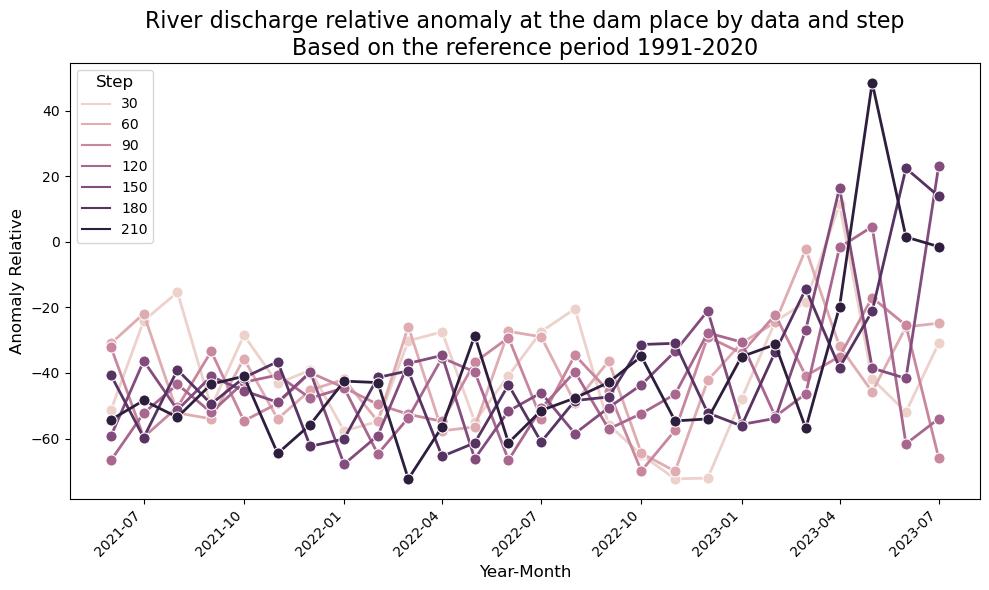

In [19]:
# Convert 'year' and 'month' to a datetime-like column
df_dam['date'] = pd.to_datetime(df_dam[['year', 'month']].assign(day=1))

# Plot the data
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=df_dam, x='date', y='anomaly_rel', hue='step', marker='o', markersize=8, linewidth=2)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Anomaly Relative', fontsize=12)
plt.title('River discharge relative anomaly at the dam place by data and step' + os.linesep + 'Based on the reference period 1991-2020', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Step', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()
fig.savefig(f'/home/jovyan/data/share/heloise/ESA-WP11/GLOFAS/figures/dam_anomalies.png')
plt.close()

## Glofas evaluation

In [2]:
def get_glofas_reforecast_year_month(year: int = 1993, month: int = 1):
    
    filepath = f'/home/jovyan/data/forecast/glofas_reforecast_01deg/q/peru_north/{year}/{year}{month:02d}/q_peru_north_{year}{month:02d}.nc'
    ds = xr.open_dataset(filepath)
    standard_ds = standardize_coordinates(ds)
    return standard_ds


In [3]:
def get_glofas_forecast_year_month(year: int = 2021, month: int = 6):
    
    filepath = f'/home/jovyan/data/forecast/glofas_01deg/q/peru_north/{year}/{year}{month:02d}/q_peru_north_{year}{month:02d}.nc'
    ds = xr.open_dataset(filepath)
    standard_ds = standardize_coordinates(ds)
    return standard_ds


In [4]:
def get_hist_step_days(start_day: int = 1, start_month: int = 1, start_year: int = 2019, day_interval: int = 30, num_days: int = 7):
    
    # Initialization at the given runtime
    current_day = start_day
    current_month = start_month
    current_year = start_year
    remaining_days = day_interval
    target = False
    
    hist_days = []

    # Loop to generate the required number of reference DataArrays
    for _ in range(num_days):
        
        # Check if the target day has been reached for the current month
        while not target:
            filepath = f'/home/jovyan/data/historical/glofas_01deg/q/peru_north/{current_year}/{current_year}{current_month:02d}/q_peru_north_{current_year}{current_month:02d}.nc'
            ds = xr.open_dataset(filepath)
            ds_hist_daily = standardize_coordinates(ds)
            
            # If the target day is within the range of the current month, update the current day and set the target flag
            if (current_day + remaining_days) <= ds_hist_daily.time.size:
                current_day = current_day + remaining_days
                target = True
            else:
                # If the target day is outside the range of the current month, move to the next month
                current_month = (current_month + 1) % 12 or 12
                if ((current_month + 1) % 12  == 1):
                    current_year = current_year + 1
                
                # Calculate the number of remaining days to add for the next reference DataArray
                remaining_days = remaining_days - (ds_hist_daily.time.size - current_day) - 1
                
                # Reset the current day to the first day of the next month
                current_day = 1
        
        # Get the target month and day
        target_month = current_month
        target_day = current_day
        
        # Select the reference DataArray for the target day
        hist_day = ds_hist_daily.sel(time=f'{current_year}-{target_month:02d}-{target_day}')
        
        # Reset the target flag and remaining days for the next iteration
        target = False
        remaining_days = day_interval
        
        # Add the reference DataArray to the list
        hist_days.append(hist_day)

    return hist_days


In [5]:
def get_bias(year: int = 2021, month: int = 6, cast: str = 'forecast'):
    if (cast == 'forecast'):
        forecast = get_glofas_forecast_year_month(year, month)
    elif (cast == 'reforecast'):
        forecast = get_glofas_reforecast_year_month(year, month)
    forecast = forecast.mean(dim = 'number')
    hist = get_hist_step_days(start_day = 1, start_month = month, start_year = year)
    
    bias_list = []
    for step in range(7):
        forecast_step = forecast.isel(step=step)
        hist_step = hist[step]
    
        bias = forecast_step - hist_step
        min_val = np.min(bias)
        max_val = np.max(bias)
        normalized_bias = (bias - min_val) / (max_val - min_val)
        
        bias_list.append(normalized_bias)
    return bias_list

In [6]:
def get_bias_all_step(year: int = 2021, month: int = 6, cast: str = 'forecast'):
    bias = get_bias(year, month, cast)
    dam = []
    for k in range (7):
        dam_bias = bias[k].sel(lat=slice(-7.2, -7.3), lon=slice(280.8, 280.9))
        #print(dam_bias.q.values[0][0])
        dam.append(dam_bias.q.values[0][0])
    return dam

#### Evaluation on the reforecast

In [ ]:
# reforecast
dam = []
for year in range (1993,2021):
    for month in range (1,13):
        dam_biases = get_bias_all_step(year, month, 'reforecast')
        dam.append({'year': year, 'month': month, 'biases by step': dam_biases})

df_dam= pd.DataFrame(dam)
df_dam.to_csv(f'/home/jovyan/data/share/heloise/ESA-WP11/GLOFAS/files_csv_nc/bias_reforecast.csv')      

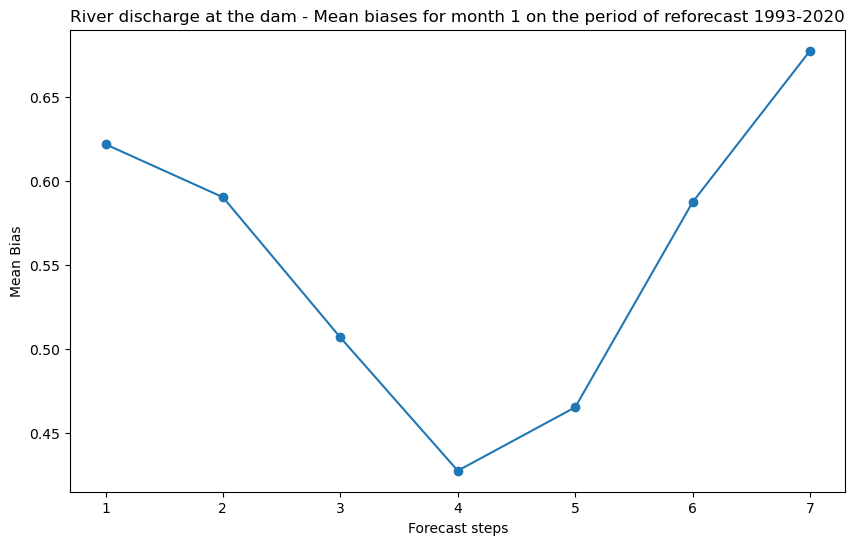

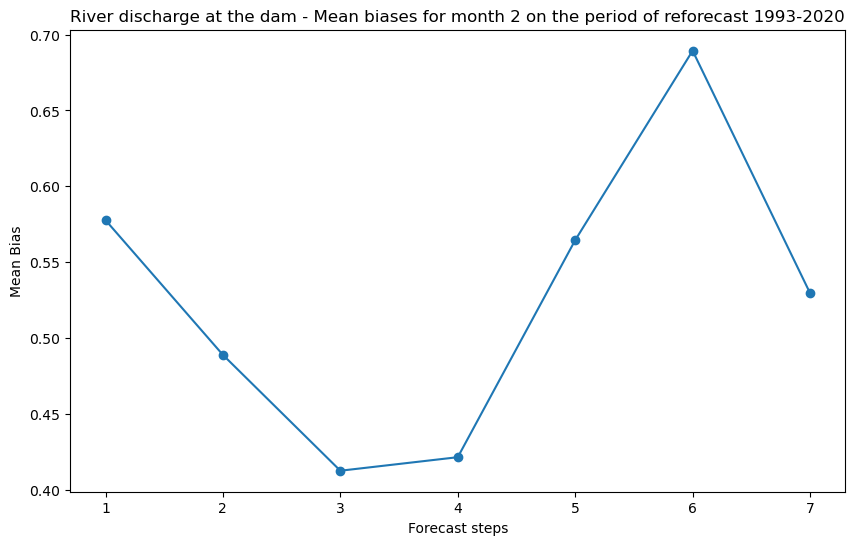

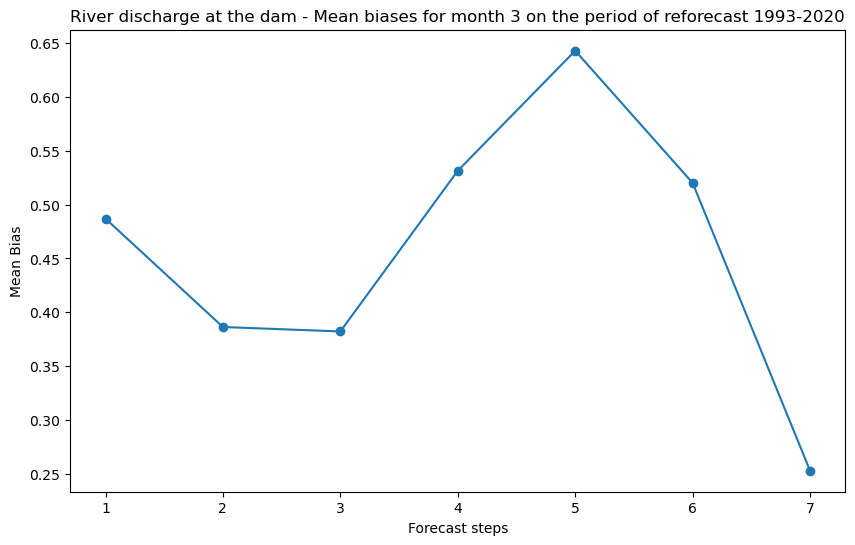

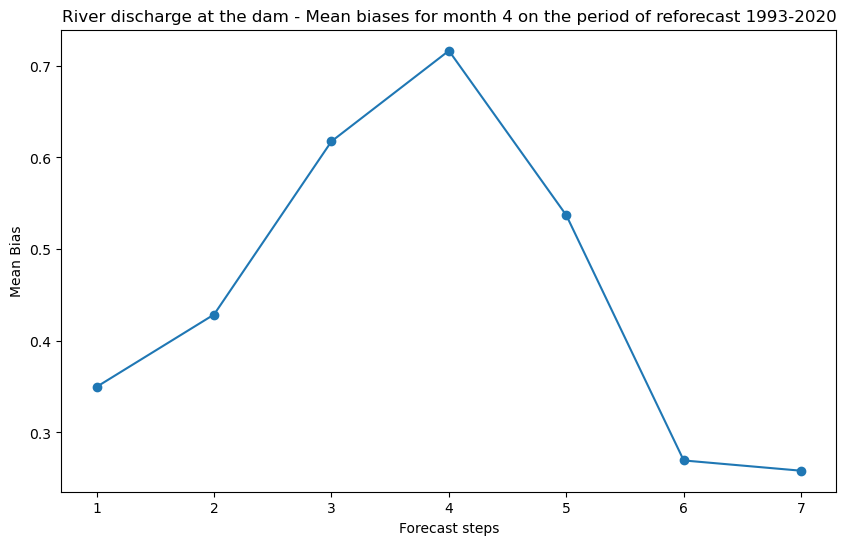

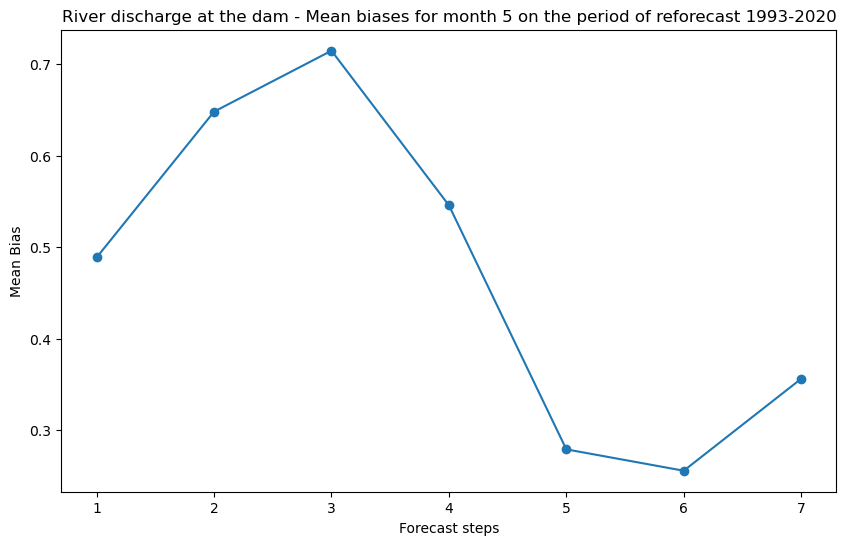

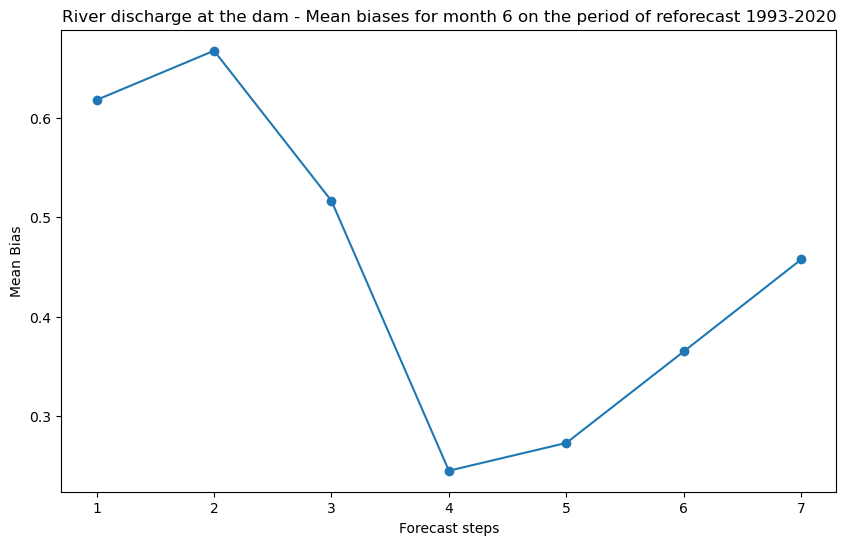

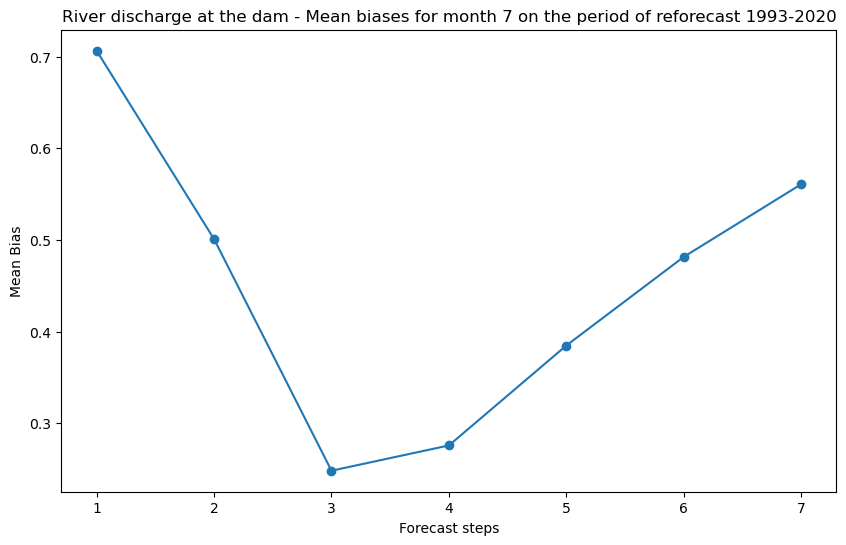

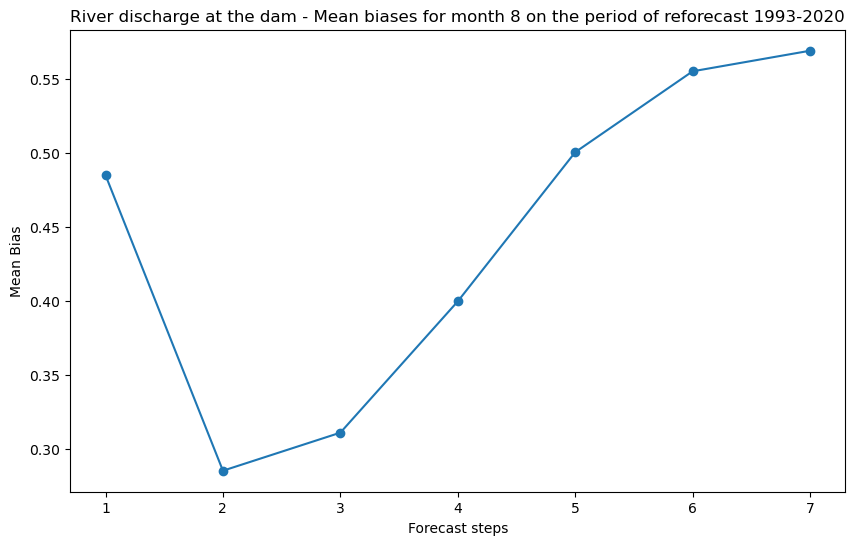

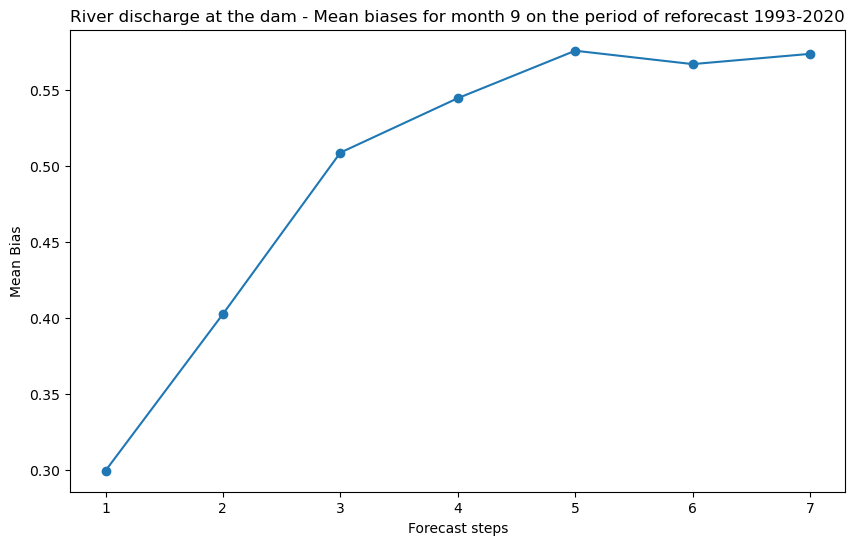

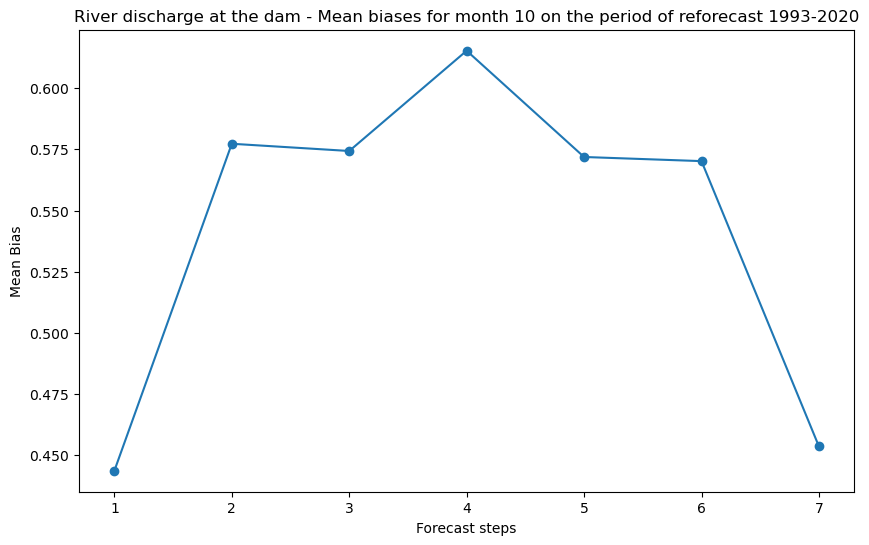

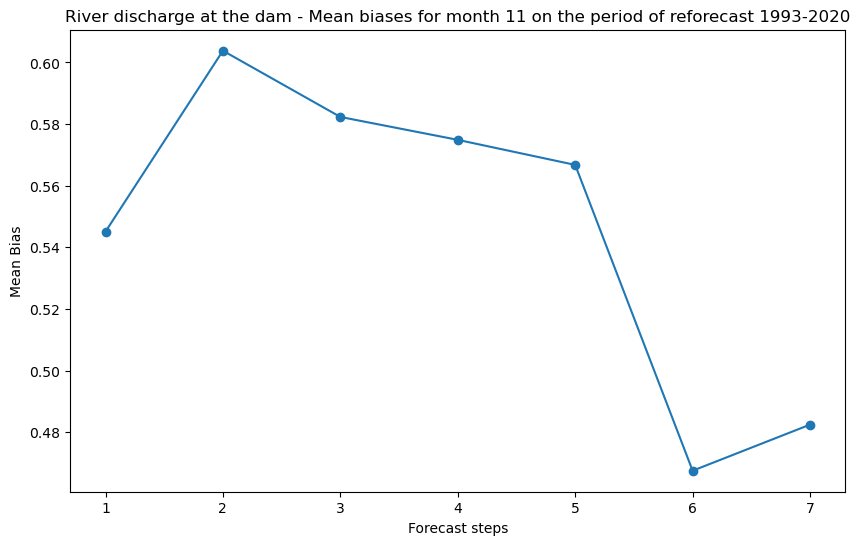

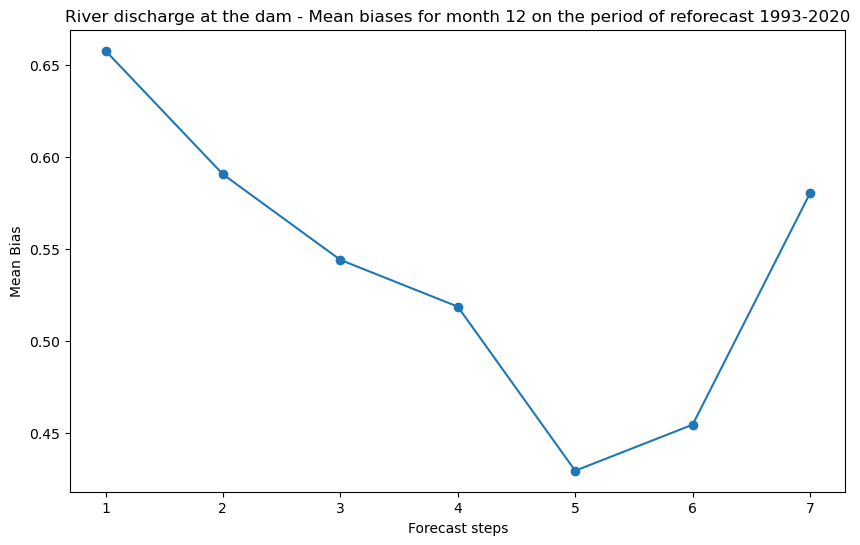

In [8]:
df_dam = pd.read_csv(f'/home/jovyan/data/share/heloise/ESA-WP11/GLOFAS/files_csv_nc/bias_reforecast.csv')

# Group the data by month
grouped = df_dam.groupby('month')

# Loop through each month and calculate mean biases
mean_biases_by_month = {}
for month, group_data in grouped:
    mean_biases_by_month[month] = np.mean([eval(row['biases by step']) for _, row in group_data.iterrows()], axis=0)

# Plot mean biases for each month with associated steps
for month, mean_biases in mean_biases_by_month.items():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(range(1, len(mean_biases) + 1), mean_biases, label=f'Mean Bias for Month {month}', linestyle='-', marker='o')

    ax.set_xlabel('Forecast steps')
    ax.set_ylabel('Mean Bias')
    ax.set_title(f'River discharge at the dam - Mean biases for month {month} on the period of reforecast 1993-2020')
    #ax.legend()
    plt.show()


#### Evaluation on the forecast

In [ ]:
# forecast
dam = []

year = 2021
for month in range (6,13):
    dam_biases = get_bias_all_step(year, month, 'forecast')
    dam.append({'year': year, 'month': month, 'biases by step': dam_biases})
    
year = 2022
# only until June 2022 because we have historical until March 2023
for month in range (1,6):
    dam_biases = get_bias_all_step(year, month, 'forecast')
    dam.append({'year': year, 'month': month, 'biases by step': dam_biases})

df_dam = pd.DataFrame(dam)
df_dam.to_csv(f'/home/jovyan/data/share/heloise/ESA-WP11/GLOFAS/files_csv_nc/bias_forecast.csv')      

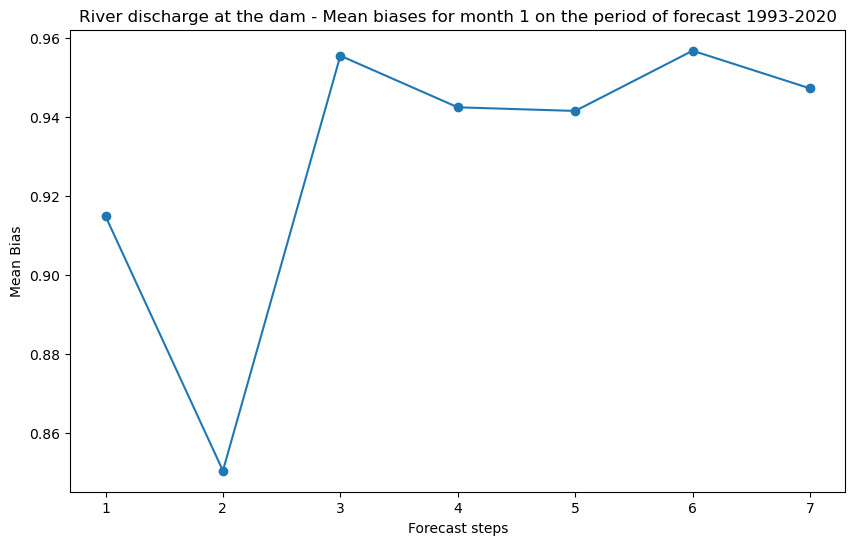

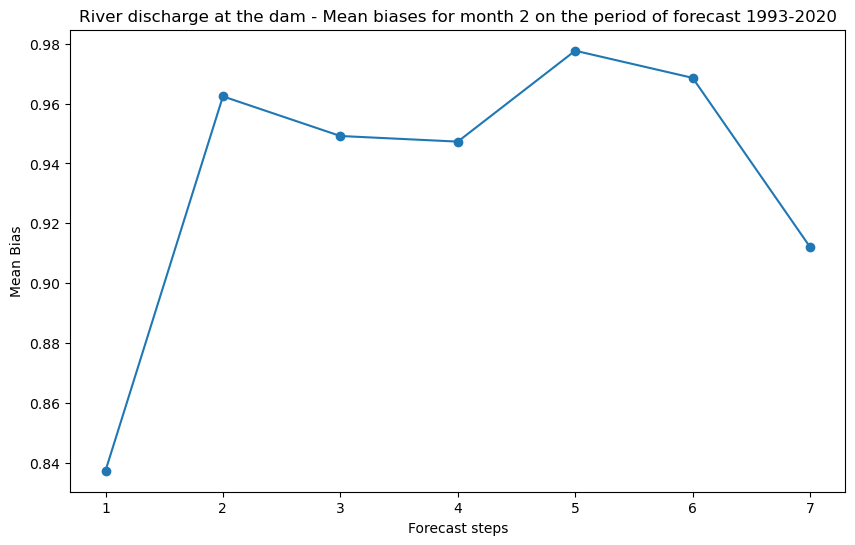

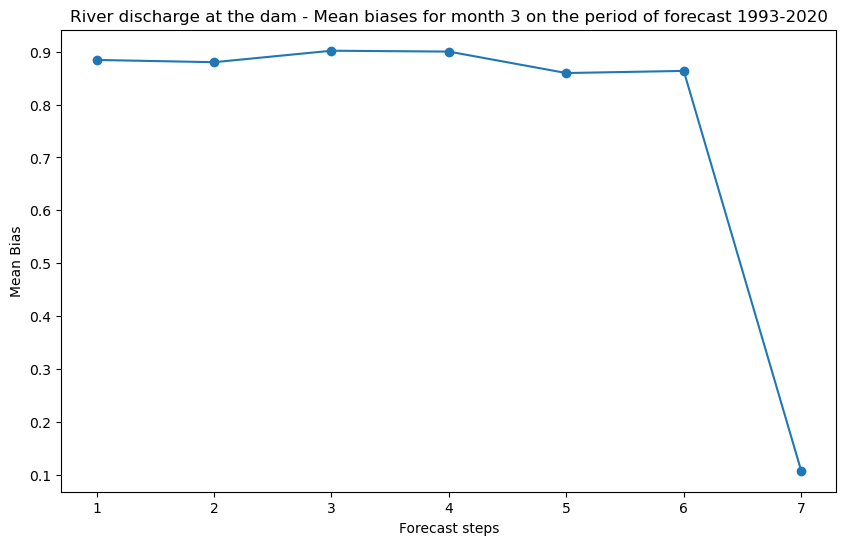

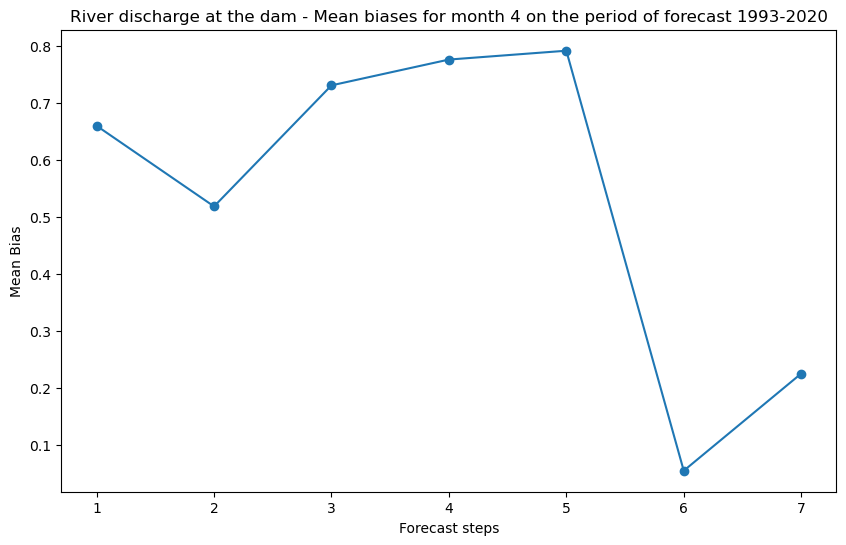

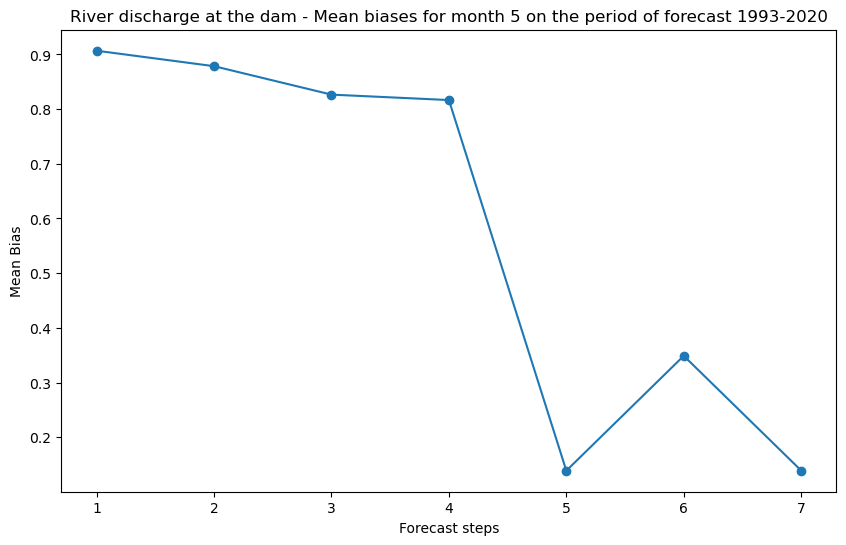

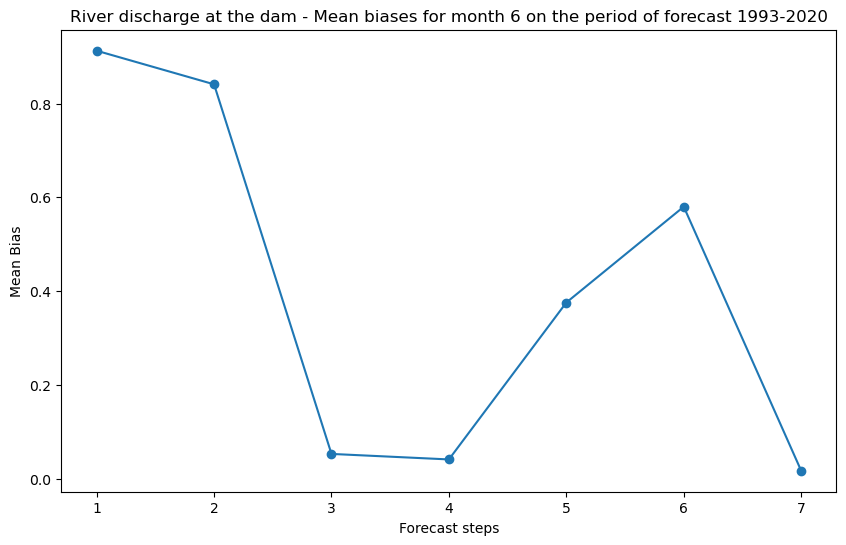

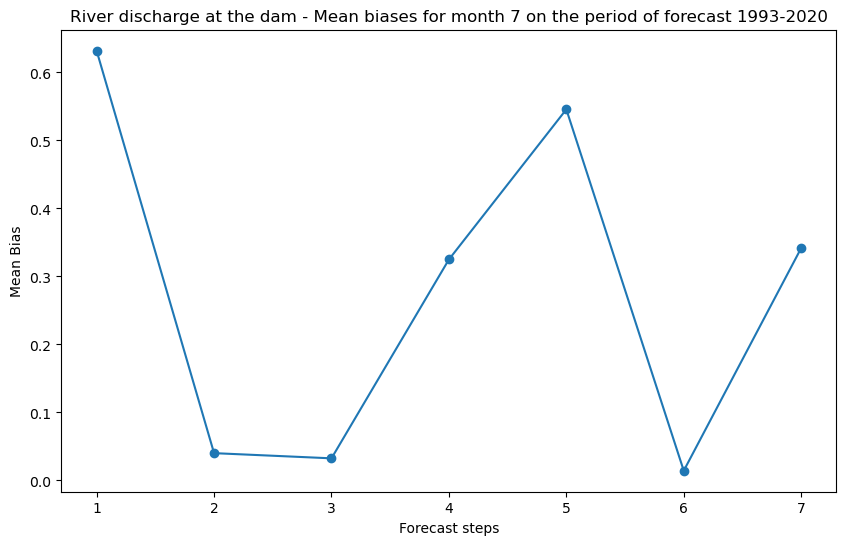

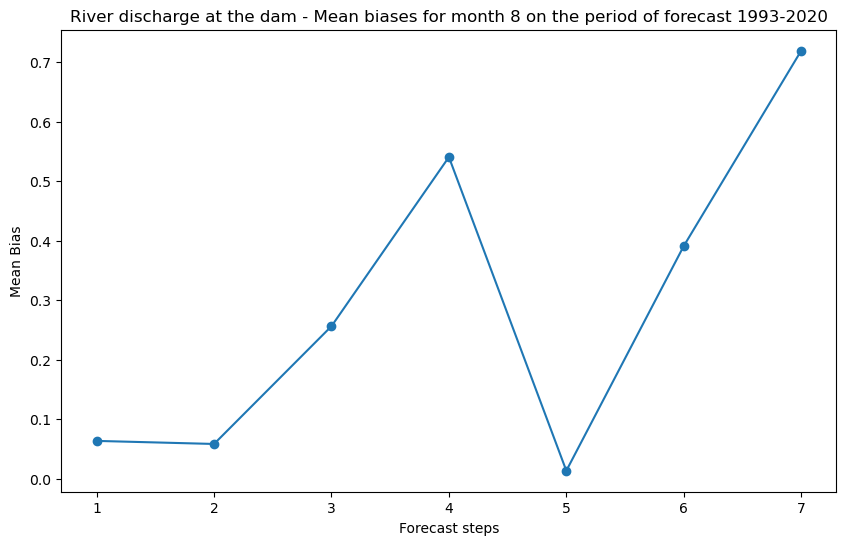

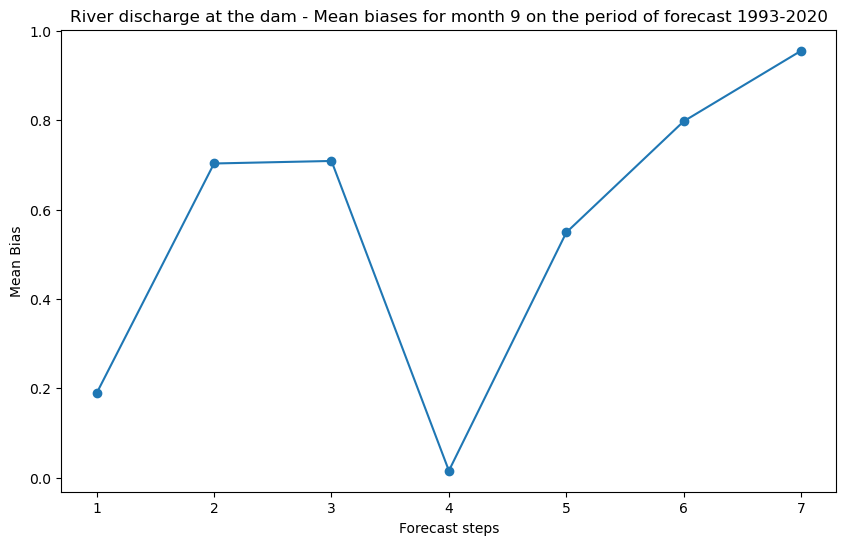

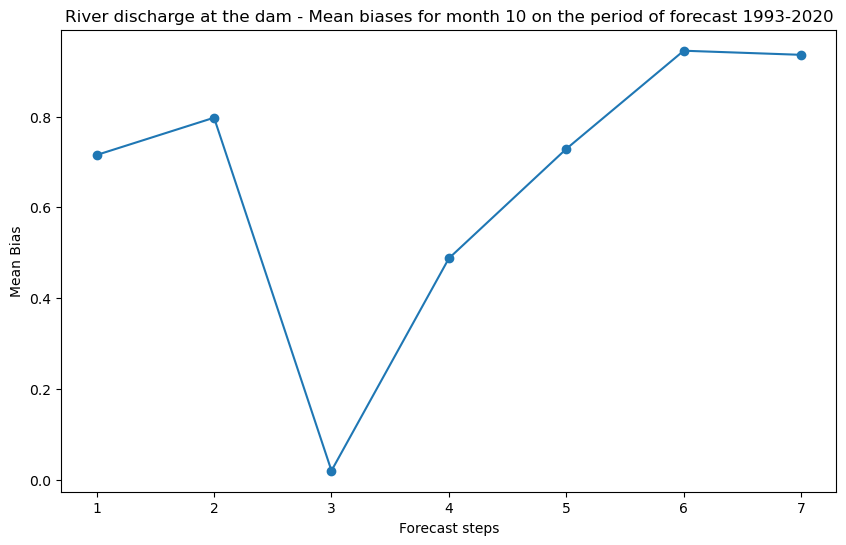

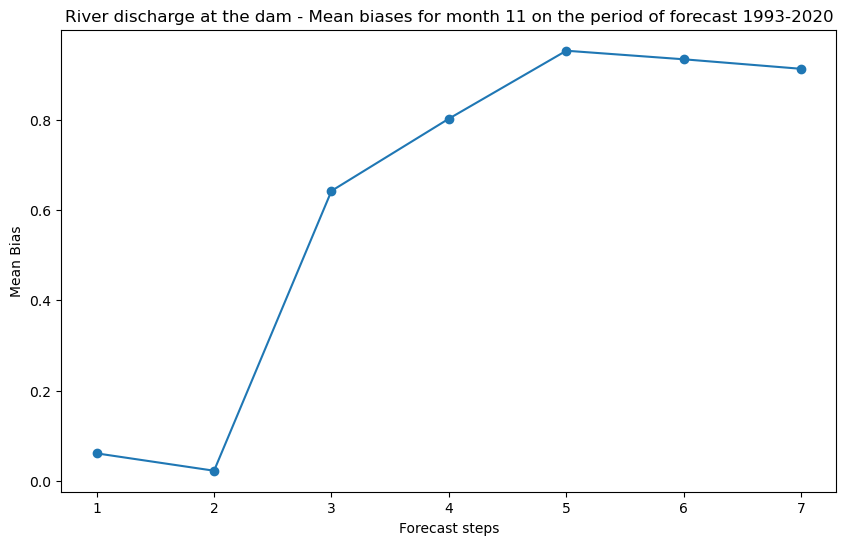

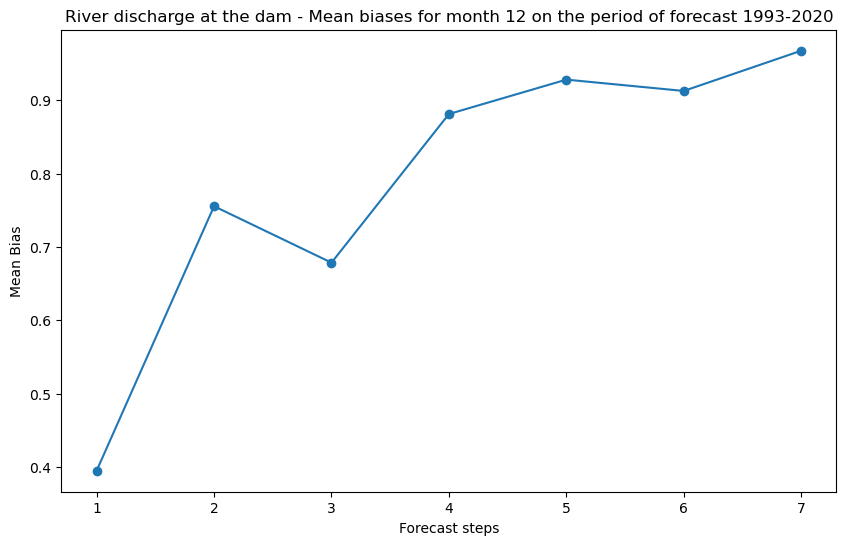

In [21]:
df_dam = pd.read_csv(f'/home/jovyan/data/share/heloise/ESA-WP11/GLOFAS/files_csv_nc/bias_forecast.csv')

# Group the data by month
grouped = df_dam.groupby('month')

# Loop through each month and calculate mean biases
mean_biases_by_month = {}
for month, group_data in grouped:
    mean_biases_by_month[month] = np.mean([eval(row['biases by step']) for _, row in group_data.iterrows()], axis=0)

# Plot mean biases for each month with associated steps
for month, mean_biases in mean_biases_by_month.items():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(range(1, len(mean_biases) + 1), mean_biases, label=f'Mean Bias for Month {month}', linestyle='-', marker='o')

    ax.set_xlabel('Forecast steps')
    ax.set_ylabel('Mean Bias')
    ax.set_title(f'River discharge at the dam - Mean biases for month {month} on the period of forecast 1993-2020')
    #ax.legend()
    plt.show()


#### Example bias for all the region and then dam

In [10]:
bias = get_bias()

/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)
/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)
/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_rename = data.rename(mapper)
/srv/conda/envs/notebook/lib/python3.9/site-packages/weatherforce/standardization.py:150: UserWarning: rename 'time' to 'time' does not 

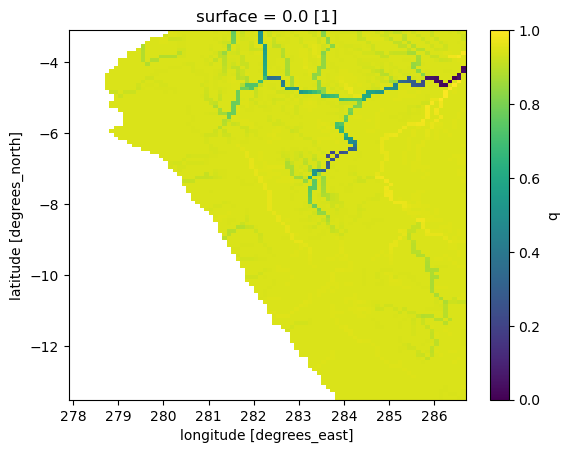

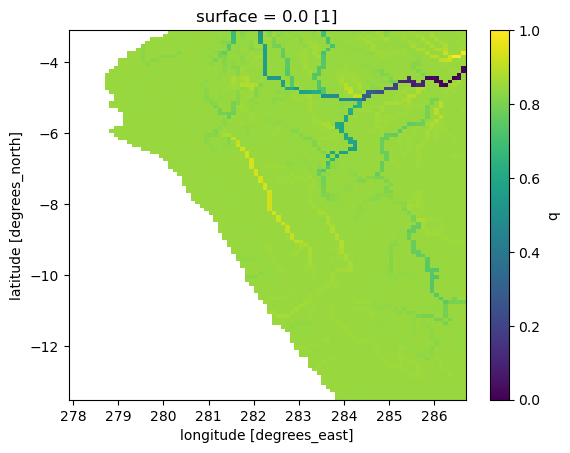

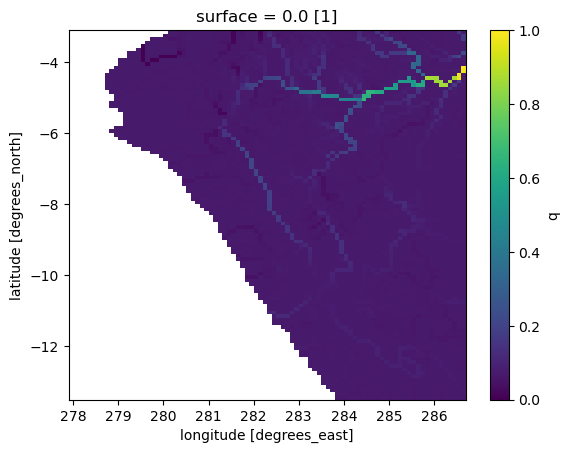

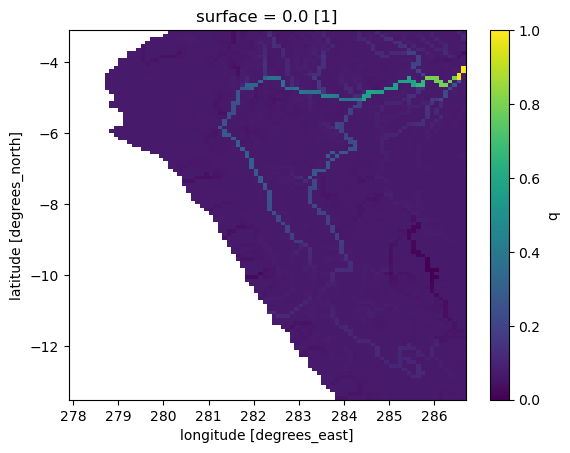

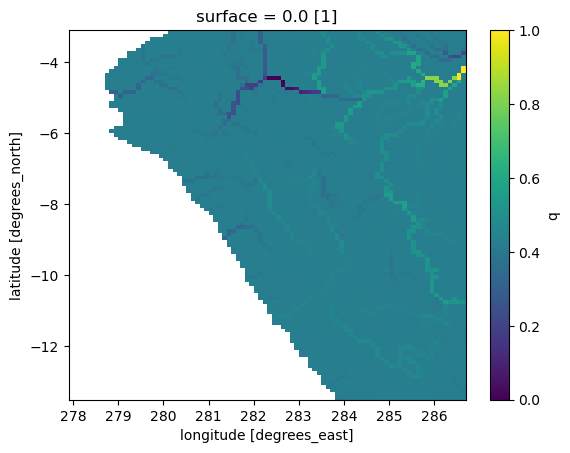

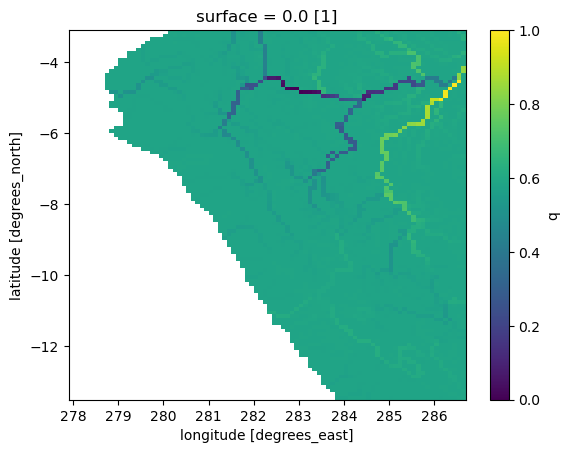

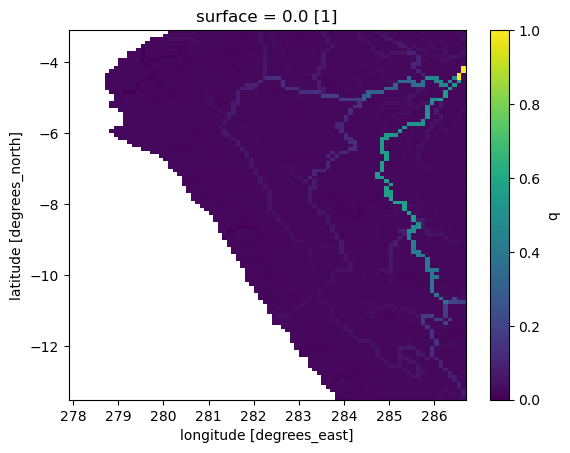

In [11]:
for k in range (7):
    bias[k].q.plot()
    plt.show()
    plt.close()


We have to choose a specific point, not a region.

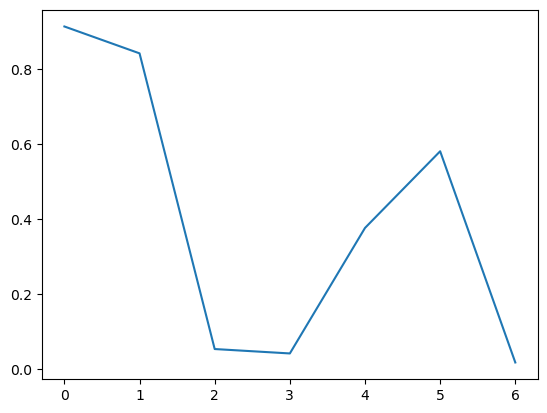

In [20]:
list_bias = []
for k in range (7):
    dam = bias[k].sel(lat=slice(-7.2, -7.3), lon=slice(280.8, 280.9))
    list_bias.append(dam.q.values[0][0])
plt.plot(list_bias)